<a href="https://colab.research.google.com/github/priyanshu3489/Deepfake-detection-/blob/main/AVCeleb_Deepfake.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import csv

# Define the path to the root directory of your dataset
root_dir = "/content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/FakeAVCeleb_v1.2"

# Define labels based on folder naming convention
video_audio_labels = {
    "FakeVideo-FakeAudio": 0,
    "FakeVideo-RealAudio": 1,
    "RealVideo-FakeAudio": 2,
    "RealVideo-RealAudio": 3
}

ethnicity_labels = {
    "African": "AF",
    "Caucasian (American)": "AM",
    "Asian (South)": "AS",
    "Caucasian (European)": "EU",
    "Asian (East)": "AE"
}

gender_labels = {
    "men": "M",
    "women": "W"
}

# Define the output CSV file
output_csv = "/content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/AVCeleb_dataset.csv"

# List to store the extracted data
data = []

# Traverse the directory structure
for video_audio_folder in os.listdir(root_dir):
    video_audio_path = os.path.join(root_dir, video_audio_folder)

    if not os.path.isdir(video_audio_path):
        continue

    for ethnicity_folder in os.listdir(video_audio_path):
        ethnicity_path = os.path.join(video_audio_path, ethnicity_folder)

        if not os.path.isdir(ethnicity_path):
            continue

        for gender_folder in os.listdir(ethnicity_path):
            gender_path = os.path.join(ethnicity_path, gender_folder)

            if not os.path.isdir(gender_path):
                continue

            # Look for .mp4 files
            for root, _, files in os.walk(gender_path):
                for file in files:
                    if file.endswith(".mp4"):
                        file_path = os.path.join(root, file)
                        # Prepare the data row
                        row = [
                            file_path,
                            video_audio_labels[video_audio_folder],  # Using folder name for Video-Audio Label
                            ethnicity_labels[ethnicity_folder],  # Using folder name for Ethnicity Label
                            gender_labels[gender_folder]  # Using folder name for Gender Label
                        ]
                        data.append(row)

# Write data to CSV file
with open(output_csv, mode='w', newline='') as file:
    writer = csv.writer(file)
    # Write the header
    writer.writerow(["File Path", "Video-Audio Label", "Ethnicity Label", "Gender Label"])
    # Write the data rows
    writer.writerows(data)

print(f"CSV file '{output_csv}' has been created with {len(data)} entries.")


CSV file '/content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/AVCeleb_dataset.csv' has been created with 2946 entries.


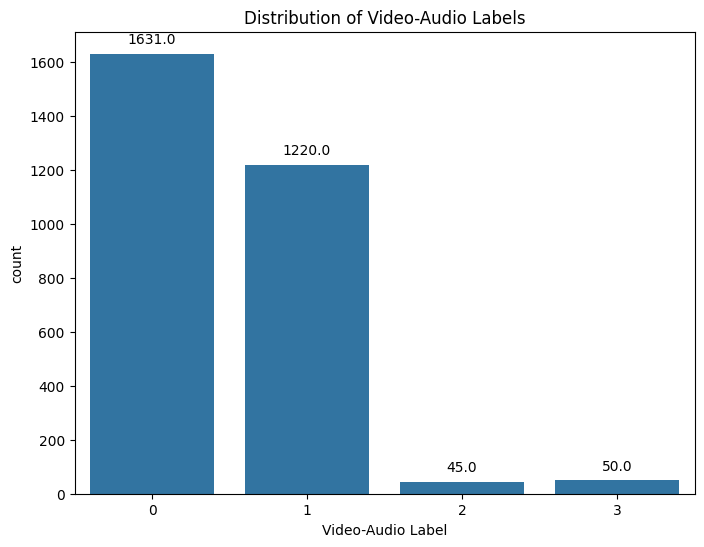

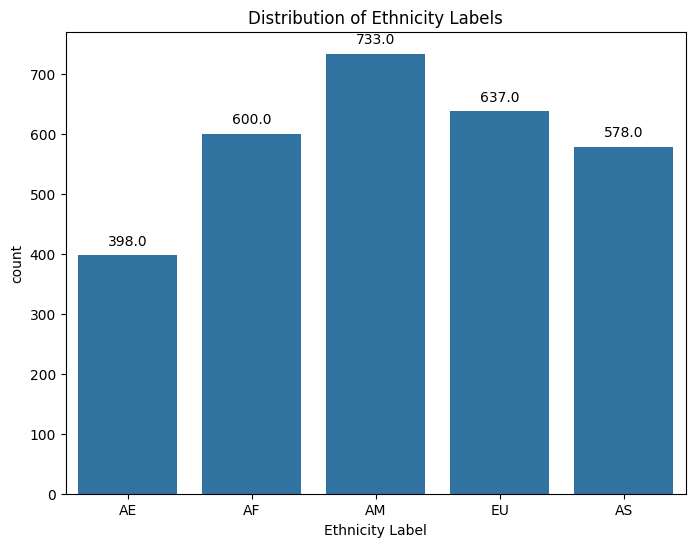

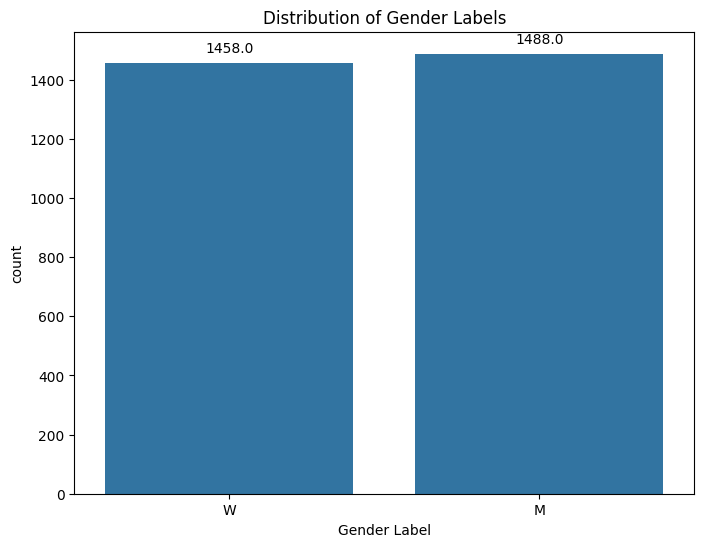

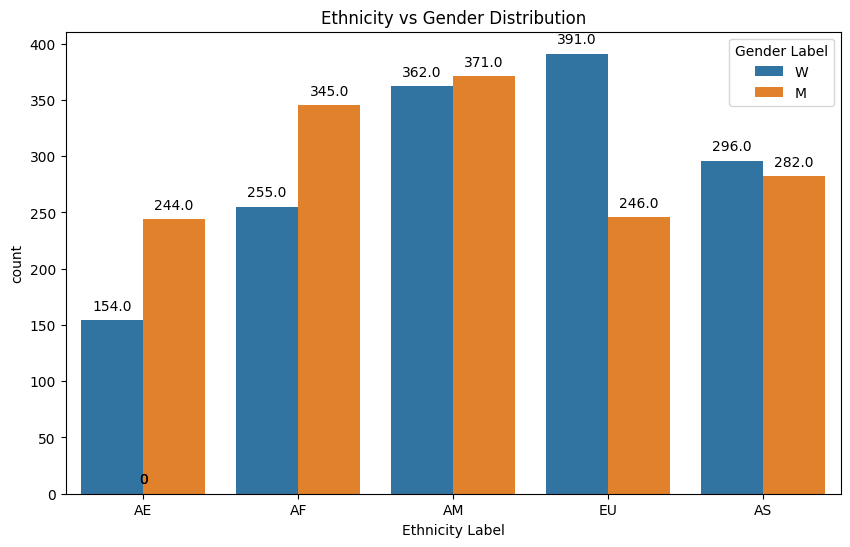

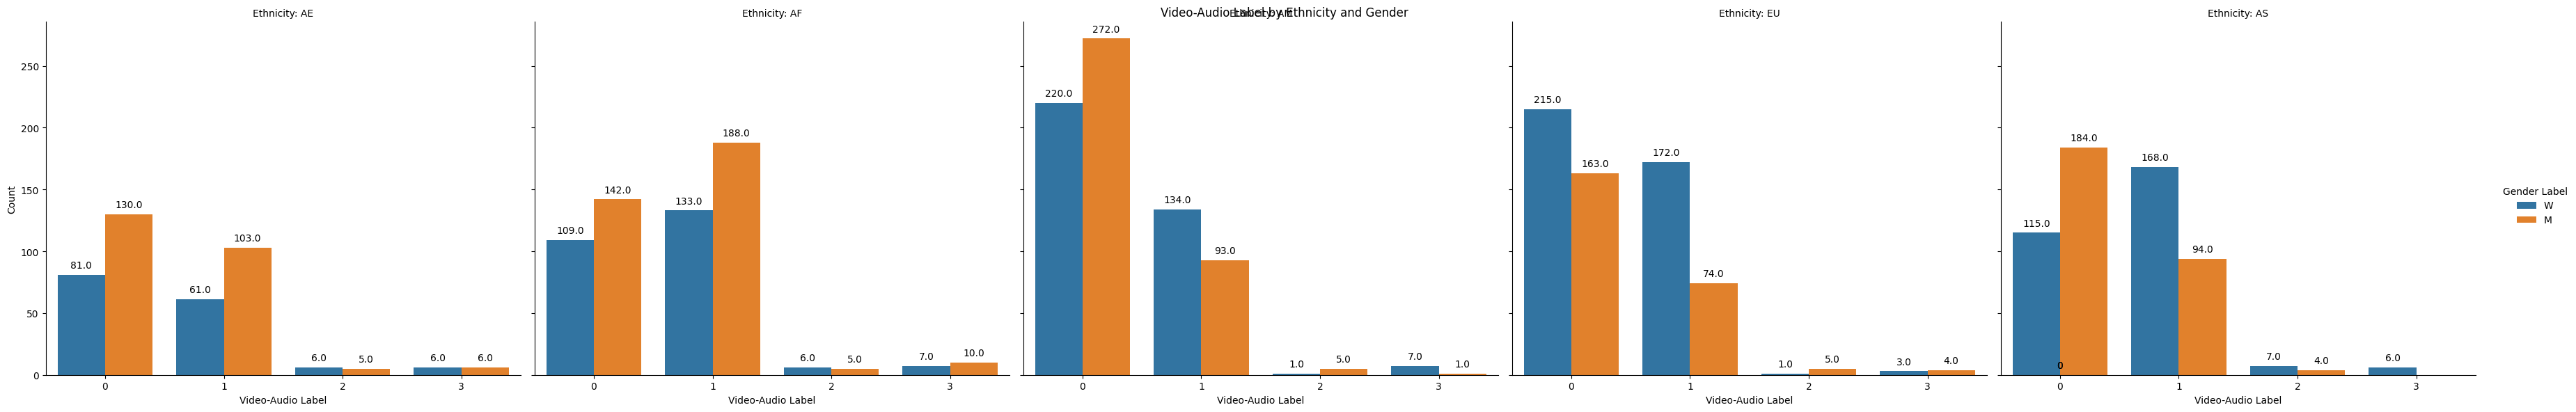

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "/content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/AVCeleb_dataset.csv"
df = pd.read_csv(file_path)

# Function to add counts on top of bars
def add_counts(ax):
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Visualize the distribution of Video-Audio Label
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Video-Audio Label', data=df)
add_counts(ax)
plt.title('Distribution of Video-Audio Labels')
plt.show()

# Visualize the distribution of Ethnicity Label
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Ethnicity Label', data=df)
add_counts(ax)
plt.title('Distribution of Ethnicity Labels')
plt.show()

# Visualize the distribution of Gender Label
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Gender Label', data=df)
add_counts(ax)
plt.title('Distribution of Gender Labels')
plt.show()

# Visualize the relationship between Ethnicity and Gender
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Ethnicity Label', hue='Gender Label', data=df)
add_counts(ax)
plt.title('Ethnicity vs Gender Distribution')
plt.show()

# Visualize the relationship between Video-Audio Label, Ethnicity, and Gender
g = sns.catplot(x='Video-Audio Label', hue='Gender Label', col='Ethnicity Label', data=df, kind='count', height=6, aspect=1.2)
g.set_titles("Ethnicity: {col_name}")
g.set_axis_labels('Video-Audio Label', 'Count')

# Add counts to each plot in the FacetGrid
for ax in g.axes.flat:
    add_counts(ax)

plt.suptitle('Video-Audio Label by Ethnicity and Gender')
plt.show()


In [ ]:
# Define the path to the root directory of your dataset
video_path = "/content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/FakeAVCeleb_v1.2"


In [ ]:
import cv2
import pandas as pd

# Load the CSV file to read video paths
file_path = '/content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/AVCeleb_dataset.csv'  # Update with the correct path
df = pd.read_csv(file_path)

# Initialize variables to compute averages
total_duration = 0
total_fps = 0
video_count = 0

# Function to get video properties using OpenCV
def get_video_properties(video_path):
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print(f"Error opening video file: {video_path}")
        return None, None

    # Get frame rate (FPS)
    fps = cap.get(cv2.CAP_PROP_FPS)

    # Get total frame count
    frame_count = cap.get(cv2.CAP_PROP_FRAME_COUNT)

    # Calculate duration in seconds
    duration = frame_count / fps if fps > 0 else 0

    cap.release()
    return duration, fps

# Iterate through each video path in the dataset
for index, row in df.iterrows():
    video_path = row['File Path']

    # Get video duration and FPS
    duration, fps = get_video_properties(video_path)

    if duration is not None and fps is not None:
        total_duration += duration
        total_fps += fps
        video_count += 1

# Calculate average duration and FPS
if video_count > 0:
    average_duration = total_duration / video_count
    average_fps = total_fps / video_count
    print(f"Average Video Length: {average_duration:.2f} seconds")
    print(f"Average FPS: {average_fps:.2f}")
else:
    print("No valid videos found.")

# Note: Make sure OpenCV (cv2) is installed in your environment



Average Video Length: 5.29 seconds
Average FPS: 25.02


In [ ]:
import pandas as pd

# Load the CSV file
csv_file = "/content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/AVCeleb_dataset.csv"

# Read the CSV into a DataFrame
df = pd.read_csv(csv_file)

# Define the problematic file paths
problematic_files = [
    "/content/drive/MyDrive/Colab Notebooks/FakeAVCeleb_v1.2/RealVideo-RealAudio/African/men/id04727 (1)/00007.mp4",
    "/content/drive/MyDrive/Colab Notebooks/FakeAVCeleb_v1.2/RealVideo-RealAudio/African/women/id02824 (1)/00130.mp4"
]

# Filter out rows with the problematic file paths
df_filtered = df[~df['File Path'].isin(problematic_files)]

# Save the filtered DataFrame to a new CSV file
filtered_csv_file = "/content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/AVCeleb_dataset.csv"
df_filtered.to_csv(filtered_csv_file, index=False)

print(f"Filtered CSV file saved as '{filtered_csv_file}'.")


Filtered CSV file saved as '/content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/AVCeleb_dataset.csv'.


In [ ]:
import pandas as pd

# Load the CSV file
csv_file = "/content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/AVCeleb_dataset.csv"

# Read the CSV into a DataFrame
df = pd.read_csv(csv_file)

# Shuffle the rows of the DataFrame
df_shuffled = df.sample(frac=1).reset_index(drop=True)

# Save the shuffled DataFrame back to a CSV file
output_file = "/content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/AVCeleb_dataset.csv"
df_shuffled.to_csv(output_file, index=False)

print(f"Shuffled CSV file saved as '{output_file}'.")


Shuffled CSV file saved as '/content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/AVCeleb_dataset.csv'.


In [ ]:
pip install moviepy

In [ ]:
import pandas as pd
import os
from moviepy.editor import VideoFileClip

# Load the dataset
file_path = "/content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/AVCeleb_dataset.csv"
df = pd.read_csv(file_path)

# Create a new column for the audio paths
df['Audio Path'] = ""

# Directory to save the extracted audio files
audio_dir = "/content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/"
os.makedirs(audio_dir, exist_ok=True)

# Extract audio from each video and save it
for i, row in df.iterrows():
    video_path = row['File Path']
    video_name = os.path.splitext(os.path.basename(video_path))[0]
    audio_path = os.path.join(audio_dir, f"{video_name}.mp3")

    # Extract audio
    video = VideoFileClip(video_path)
    video.audio.write_audiofile(audio_path)

    # Update the dataset with the new audio path
    df.at[i, 'Audio Path'] = audio_path

# Save the updated dataset
updated_file_path = "/content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/AVCeleb_dataset.csv"
df.to_csv(updated_file_path, index=False)

print(f"Updated dataset saved to {updated_file_path}")


  if event.key is 'enter':



MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00167_id01124_Lnf2oGSM00s.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00141_id07195_wXqfHGtaBn4_id08314_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00195_id03696_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00050_id00475_xQjvXRcnPvw_faceswap_id02005_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id01018_wavtolip.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00043_id00434_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id00287_2NpfYjyMsPM_faceswap_id03858_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00273_id02808_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00092_id00806_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_1_id00235_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00027_id04599_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00130_id00944_DiW5D62667U.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00056_id02838_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00056_id02721_rwNm8RKL47Y.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00050_id00475_xQjvXRcnPvw_faceswap_id04727_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00039_id00418_KSTOz7H0OuQ_id03556_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00111_id00773_2j3lUETJ57I_id07195_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00143_id00076_Isiq7cA-DNE_faceswap_id01207_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00078_id00287_wavtolip.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_1_id00381_wavtolip.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00053_id02310_zA-8Pw0SvZg_id06343_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00072_id01075_MtJUiHspdT0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00130_id01099_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00174_id02586_dEYzYDsbAeo_faceswap.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00072_id02089_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00130_id01171_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00171_id03696_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00010_id00773_2j3lUETJ57I.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00086_id03649_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00083_id05235_ASy8lP3SRtw_faceswap.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00002_id01170_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00077_id04530_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00143_id00685_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id00616_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00109_id01637_5VjcPZm8knM.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00273_id00359_RZMQan-7me4_id00592_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00130_id00186_KTjDxHTlzg0_id00999_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00063_id01163_QSMeUEH3lJM_id00020_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_2_id01223_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00019_id00478_UOK9hQZm-6k_id02268_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00092_id03858_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00241_id00243_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00044_id01528_SBAS9Kcb8QY.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00005_id00417_GhIZam3v09g_id00043_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00135_id01528_SBAS9Kcb8QY.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00044_id00476_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00305.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00111_id07768_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00072_id00145_JveyoCdoCuI_id00261_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id04216_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00217_id00185_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00077_id07136_4e43eS5p3_M_id07051_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00187_id00055_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00040_id00633_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00078_id00234_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00195_id00231_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00167_id00696_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id02838_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00162_id00848_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00032_id06462_Nn79kE76MA4_faceswap_id03211_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00072_id00618__TwV2SmUIlY_id00100_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00143_id00732_amGRpH0AJCs_faceswap_id00459_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00043_id00261_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00051_id04884_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00017_id00371_t20i0HtPwW0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00005.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00138_fake.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00092_id03716_s-lxbGafZQA_faceswap_id00434_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00072_id04490_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00051_id05268_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00143_id04727_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00078_0_id00634_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00284_id06343_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00025_id05478_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00039_id01216_IRxEWpT_lZs_id01238_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00162_id00272_VLY1boTtbRM.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00171_id00418_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00078_id00813_dKs9CWJIkSI_id00735_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00284_id02310_zA-8Pw0SvZg.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00001_id00701_lW6uzLIOwd0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00043_id03781_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_fake.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00050_id01036_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00167_id00945_V-rSeF8o5pc_id00775_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00111_id06354_PmWLmcJNUhM_faceswap_id04560_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id04540_9KNIjew03AQ_id02586_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00281_id07136_4e43eS5p3_M.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00162_id00180_lkeAa8Od_tg.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00175_fake.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00002_id01215_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00050_id01179_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00111_id06354_PmWLmcJNUhM_faceswap_id08313_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id02301_WdVa7Mp3brI_id03569_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00141_id04526_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00107_id00088_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id05106_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id00052_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00072_id00462_EMnGfAq9gg4_id00841_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00139_id06438_vf3xBVgYqYA.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00167_id01172_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00169_id03844_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00025_id00943_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00043_id00234_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00050_id00475_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00111_id00032_AQMDc6SKNXs_id07179_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00005_id04561_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00195_id00841_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00241_id00060_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00023_fake.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00025_id03559_pgetxl1qbzM_faceswap(1).mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00050_id02268_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00001_id01637_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00010_id01171_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_3_id03556_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00078_3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00241_id00018_sap-FjURHlc_id00945_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00206_id02296_IAgOrCuY8vU_faceswap.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00033_fake.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00169_id03649_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/06152_id04687_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00040_id00330_wavtolip.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id00271_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00273_id02824_glBy_mYcXZw_faceswap_id04374_wavtolip.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00169_id00823_KgExwCvgrUk.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00056_id03656_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id02494_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00042_id04820_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00010_id00374_wavtolip.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00063_id03757_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00217_id00709_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00135_id06268_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00069.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00169_id00496_SImaDcXQnh8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00135_id03815_hw41YlLps4w_id07377_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00013_id06443__jnYg_I0Zpc.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00195_id01217_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00169_id03858_uKVqPfRf-ac_id00332_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00135_id00043_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id00180_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00113_id00535_BhvTIJ-YG5s.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00025_id03371_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id00270_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00138_id03211_HK4oe6Hi91E.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00171_id01005_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00072_id00835_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00021_id04562_qio_Gs7wjvY.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00005_id00566_V3Hg_HMhuwQ_id00430_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id06594_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id00287_2NpfYjyMsPM_faceswap_id00379_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id00359_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00017.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00025_0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00405_id05920_LuLTJu54joo.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00273_id02824_glBy_mYcXZw_faceswap_id04055_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00021_id01597_52WEZxe4_GE.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00110.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_0_id04034_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/05479_id02365_wavtolip.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00217_id00063_cVZBXC2rjPM_faceswap_id01099_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00005_id06061_TckvmWR97vo_faceswap_id05631_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00169_id00496_SImaDcXQnh8_id00330_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00118_id07768_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00053_id04582_Pm9dX-TxNx0_id04490_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00143_id07163_aO7f_YmkQnc_id04537_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00092_id06269_Jm9bEizIGBE_id00863_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00083_0_id00032_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00072_id07078_sLVbTD3Dtgw_faceswap.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00010_id00560_HCZHIOhZ6XM.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00187_id00559_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00025_id03559_pgetxl1qbzM.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00078_id01779_HgyHpDEo_jk.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00245_1_id06152_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00281_id07136_4e43eS5p3_M_faceswap.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00092_id01058_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00055_id00145_JveyoCdoCuI_id01004_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00004_id00484_u7YTz8eFZv0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00050_id01835_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00078_id00234_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00051_id03889_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00067_id07799_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00139_id06445_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00150_id04070_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id03556_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00032_id09174_Qspzu6tyArc_id06061_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00195_id00458_K4t1pQZL7ck_faceswap_id01223_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00167_id01163_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00001_id00391_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00167_id00971_edWrVVn-rC4_id00775_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id02617_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00027_id00033_gduDuRWhnlQ.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00110_id05479_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00065_id00897_wavtolip.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00206_id00475_xQjvXRcnPvw.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00281_id04070_F3CgrqRjcgw.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00150_id00080_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00311_id00581_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00072_id00261_gYQ5Scz5FnA.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00001_id01598_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00002.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id04689_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00053_id04927_8MD618FRyfA_id04582_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00005_id08402_nedfiSXfmQ0_id03379_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_1_id02721_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00013_id00566_V3Hg_HMhuwQ_faceswap_id05631_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id04111_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00130_id01126_zorX3gXf_vg_id00990_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00072_id00616_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00086_id03816_XXD0yTNei50.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id00498_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00195_id04245_nQD_PRlBDyw.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00187_3_id00981_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00311_id00633_UXrTMta1EDM_id00071_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id00569_gSynmpwioV4_id00262_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00245_3_id06470_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00154_id04554_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00206_id04727_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00083_1_id06753_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00048_id00554_crjq1dFN1Ko_faceswap_id00559_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00195_id02721_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00040_id00395_wM5kGJfTtEM.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00040_id00430_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00078_id00781_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00092_id00287_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00169_id00395_wM5kGJfTtEM.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00021_id03599_y27BDmRUqMQ.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id00476_UgdYVJ6xPYg_faceswap_id01179_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00217_id01051_jPxk6s6FM6Y.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00107_id01124_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00171_id01005_lJZrqhcRFSA.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00072_id02619_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00109_3_id01392_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00005_id06061_TckvmWR97vo_faceswap_id03379_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00253_id03668_mjurT3_7DpE_id01239_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00005_id00417_GhIZam3v09g_faceswap_id06343_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id00417_GhIZam3v09g.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00040_id04701_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00005.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00083_id05235_ASy8lP3SRtw_faceswap_id02721_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00281_id03897_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00053_id00235_F7aHtfdzytQ_id04070_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00109_id01544_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00160_3_id00616_wavtolip.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00118_id07161_OYWKr82Zu38_id07058_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00253_id00184_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id04034_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00027_id00769_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00135_id06268_wavtolip(2).mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00195_id01225_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00048_id00358_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00005.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00160_0_id01075_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id00374_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00078_id01005_lJZrqhcRFSA.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00050_id00173_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00072_id03781_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id04727_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00019_id00366_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/02561_id06807_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00154_id04537_G1e1UFopjfI_faceswap_id07108_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00135_id02296_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_fake.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id00253_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00118_id00732_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00135_id00417_GhIZam3v09g_faceswap_id02619_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00130_id01051_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00044_id01528_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id07194_NDJaiff98Fo_faceswap_id07161_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00080_id02948_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00171_id01217_wavtolip.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00169_id00330_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00053_id04582_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00017_id00829_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00154_id03525_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00167_id00088_6WIDWxr8vuU.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00078_id00330_zCFFgGSIZ_s_faceswap_id00379_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00002.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00139_id03985_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00195_id01245_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id05576_g3SKd3BsV9I.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00002_id00943_LxSv2rnBGA8_id00021_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00077_id00080_y29QtxBTASE_id04927_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00005_id00137_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00141_id00769_BqHVSZdoVpM_id00773_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00241_id00021_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00072_id00418_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00130_id00761_QtTNFhCCgzw.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_1_id00359_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id00186_KTjDxHTlzg0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00010_id02316_yrrNcmZ-xmI.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00043_id00462_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00206_0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00004_id03589_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00273_id00577_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00078_id01227_eNr-P3gIrgo.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00032_id05631_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id04547_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00043_id00633_UXrTMta1EDM_faceswap_id00897_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id00330_zCFFgGSIZ_s_id03651_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00253_id00945_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00065_id00374_w1qI7y9AGTc_id00826_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00195_id02617_4EZjRXC4fLk.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00005_id00417_GhIZam3v09g_faceswap_id06428_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00130_id00909_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00025_id03559_pgetxl1qbzM_faceswap(3).mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00076_id00559_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00043_id00633_UXrTMta1EDM_faceswap_id00042_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00253_id01044_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00107_id00264_gslpgRLj4Xo_id04073_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id02508_wavtolip.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00010_id01544_uBo9585VW2A.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00048_id00963_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00078_0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00167_id00052_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00044_id01171_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00138_id06061_TckvmWR97vo.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00146_fake.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id04111_Fg4CZ7ZzAGU.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00217_id01154_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id00060_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id06878_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id00476_UgdYVJ6xPYg_id00478_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id00184_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00154_id04537_G1e1UFopjfI_faceswap_id04554_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/06152_id05383_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00405_id06445_NWtdqOxEbDY.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00162_0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00092_id00225_MHSgwpfHAXw_id02567_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id04705_ziJ9JsYr4R0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00118_id04537_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00072_id00428_Kr7n-68JWww_id01216_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00083_id03599_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id06470_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00050_id01171_XSINMRoTb0E_id01530_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id00462_EMnGfAq9gg4_id00261_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00143_id00518_qm7oQcDg4oI_id01779_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00027_id07200_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00130_id02005_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_2_id01075_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00056_id06878_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00245_id09053_6baCAGutGFg_id04222_wavtolip.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00076_id01051_jPxk6s6FM6Y.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00169_id00395_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00139_id03815_hw41YlLps4w.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00006_id02494_lObg47hQleE_id01597_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id06066_9e5vgpwmruA.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00195_id01178_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00092_id03589_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00149.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00143_id00076_Isiq7cA-DNE_faceswap_id01920_wavtolip.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00044_id01610_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id00020_VXYAbbQWyQM_id00529_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id00234_M3g5KRLJB60_id00434_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00092_id00188_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id05106_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00092_id00225_MHSgwpfHAXw_faceswap_id00519_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00195_id00835_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id03678_dsfCxodI9i8_id01124_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00086_id01018_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00019_id01521_jthjSmLdLOg_id00830_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00002_id00775_yeCUxHgUHxc_faceswap_id03757_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00032_id08139_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00424_id02948__ZEDGNWjuFE.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00143_id07058_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00048_id00999_SjnM4XFBz0M_id00282_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id01210_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00195_id01231_XXpYdOHUF-g_id00180_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id00063_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00072_id07078_sLVbTD3Dtgw.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00078_id01238_VPdv2sexRy0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00063_id03678_dsfCxodI9i8_id00775_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id00569_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00039_id03696_Kz45DNXKLXI_faceswap_id00841_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00150_id07078_sLVbTD3Dtgw.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00072_id03707_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00107_id00052_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00278_id00345_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00092_id03649_389qfFqUddI.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00011_id04057_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00141_id00414_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00135_id04564_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00013_id00763_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00055_id02466_VOgaA7O5yWY_faceswap_id00458_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id00476_UgdYVJ6xPYg_faceswap_id02005_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00002_id04073_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00077_id05845_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00040_id00633_UXrTMta1EDM.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00174_id00460_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00065_id00484_u7YTz8eFZv0_id03620_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id00025_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00195_id01231_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00086_id01002_eQTviHjyISo.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00076_id00963_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00009_id00971_edWrVVn-rC4_faceswap_id00029_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00217_id00946_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00078_id00495_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00092_id00395_wM5kGJfTtEM.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id03747_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00167_2_id01035_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/06152_id07102_wavtolip.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00109_id01779_HgyHpDEo_jk.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id00848_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00092_id09053_6baCAGutGFg_id04789_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00171_id00848_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00025_id00020_VXYAbbQWyQM.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_2_id00418_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00005_id07136_4e43eS5p3_M_id04583_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00143_id02051_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id04437_2csrqaF55pk.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00086.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00053_id06343_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00086_id00403_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00110_id06807_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00118_id00082_wavtolip.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00253_id03757_L-M-XbdFLQM_id00345_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00154_id04537_G1e1UFopjfI_faceswap_id07233_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00010_id03028_u74oQfYf4GI.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00044_id01597_52WEZxe4_GE.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00217_id00225_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00281_id01026_rM4ZERt7oM0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00002_id00775_yeCUxHgUHxc_faceswap_id00264_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00245_2_id02553_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id02948__ZEDGNWjuFE_id03656_wavtolip.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00169_id00365_XV-imLNJvfk.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00092_id03716_s-lxbGafZQA_id00395_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00077_id03985_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00010_id06807_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id02948__ZEDGNWjuFE_id04939_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00014_id07058_JXJTxhrICl0_faceswap_id00816_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00065_id00735_ivJSkq5hGOQ_id03589_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00405_id04927_8MD618FRyfA.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00037_id00462_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id00752_mqS1sUVFjhM_id00848_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00063_id00708_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00078_id01171_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00005_id07058_JXJTxhrICl0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00072_id01075_MtJUiHspdT0_id01245_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00002_id02316_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00284_id02619_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00025_id00488_wavtolip(1).mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00107_id00184_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00065_id03620_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00245_1_id04222_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id04034_8ZeJXbjFa_o_id01239_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00005_id00579_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00048_id01231_XXpYdOHUF-g.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id03649_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00273_id04689_0YqK1ksKjLg_id00359_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00021_id00830_rfl3Teg9uew.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00014_id03344_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00010_id01018_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00013_id00566_V3Hg_HMhuwQ_faceswap_id06065_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00284_id07689_2ie0g83JkgA.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00078_id00395_wM5kGJfTtEM.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00135_id05845_XfMHm6CEwPw(2).mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00107_id00060_gZ4RkcQ0SXE_id04216_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/06152_id06467_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id00806_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00032_id03940_axeR0CLu96U_id03211_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00135_id04529_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id02948__ZEDGNWjuFE_faceswap_id04689_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00050_id01856_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00143_id01530_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00273_id05235_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00284_id03559_pgetxl1qbzM.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00241_id01201_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00078.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00077_id07136_4e43eS5p3_M_faceswap_id06437_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00056_id01204_biYGqpYBp7o_faceswap_id06467_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00187_id00559_Y7ovoKuvL78_id00709_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00273_id02071_cHuDh9F87vA_id02071_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00055_id00458_wavtolip.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00051_id05383_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00025_id00365_XV-imLNJvfk.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00278_id00049_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00032_id00763_lI1GEn3Ima0_id00582_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00044_0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00063_id00696_7PrURACjhqU_faceswap_id00264_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00245_id01212_ZuKSE0WIlpM_id04111_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00083_2_id03599_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00135_id05478_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00245_id05332_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00284_id00417_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00042_id04939_i4v2cXo9HIQ_faceswap_id04245_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00169_id00262_3p7sRWAAh1Q.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00076_id00171_PWU6n0qrv4c.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00245_0_id00597_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00040_fake.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00025_id03559_pgetxl1qbzM_faceswap.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00040_id00365_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00078_id00826_MYagwzy91Yk.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00092_id09143_rnD7HryoyLY_faceswap_id05743_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id00592_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00005_id04526_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00063_id00021_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00141_id00732_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00025_id01105_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00171_id01217_7lVC4xEK_6E_faceswap.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00027_id00414_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00111_id07108_qwfQPcvjGRY_id00032_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id00581_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00078_id01452_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00245_id08299_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00076_id00306_CDX55F3nWNc.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00072_id00428_Kr7n-68JWww_id00555_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00067_id02587_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id06152_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00078_id00068_A7uFnQw--bY_id01002_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00118_id07200_quCElxMhW6g_faceswap_id07108_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00025_id01201_Q8XWfmNiWYA.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00048_id01075_MtJUiHspdT0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00042_id04055_0qrzF4HLXHY_id02301_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00013_fake.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00065_id00581_7AxvP19LGKg_faceswap_id01018_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00107_id04073_KT7B07WFWyM_faceswap_id00777_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00065_id00806_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00010_id06269_Jm9bEizIGBE.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00010_id03344_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00109_id02051_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00187_2_id00981_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00195_id00100_sZ0Ex4WUEgM_id00145_wavtolip.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00043_id00325_4vJtbNe0L98_id00330_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id00330_zCFFgGSIZ_s_id00826_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00050_id01691_IVtS5z8Jrrk_id01610_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_3_id00235_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id03707_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00014_id03344_vyNnOo6lU0o_id00082_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00055_id01231_wavtolip.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00092_id09053_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00004_id03371_truKMXt8Dak.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00019_id01835_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00042_id02948__ZEDGNWjuFE_id02508_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00072_id05435_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00025_id00287_2NpfYjyMsPM.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00169_id03589_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00118_id07195_wXqfHGtaBn4_id07200_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id01783_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id07161_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00206_id00018_sap-FjURHlc_id04221_wavtolip.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id00018_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00169_id00897_0ayFw8JhoyI_faceswap_id00634_wavtolip.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00118_id00685_Hgrz1Tbmix4_id00816_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00072_id00100_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00092_id00535_BhvTIJ-YG5s_id00990_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00130_id00559_Y7ovoKuvL78_faceswap_id01154_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id03589_wavtolip.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id05383_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00011_id07039_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00005_id00739_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00072_id00291_wavtolip.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00195_id00458_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00076_id00305_LdcY3ILdQrE.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00143_id01544_uBo9585VW2A_id01207_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id00495_E46aiMUC4A0_faceswap_id00826_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00167_id00088_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00278_id04221_5XfsCrxGvj4_faceswap_id00088_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00005_id06334_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00135_id04529_S92uo-UShxE.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00130_id00368_KohcGDsg29U_id00241_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id01044_wavtolip.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00021_id00857_yJ7bbvwL4kU_faceswap.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00154_id00773_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00050_id00475_xQjvXRcnPvw_faceswap_id00475_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id00826_MYagwzy91Yk_id00271_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00017_id05106_ZnnDdjlABM4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00037_id00428_Kr7n-68JWww_id00462_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00002_id01171_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00002_id00708_Dzmb0FH1xBc_id00943_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00195_id00385_oqf8cNi7lOI_id01225_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00162_id01238_VPdv2sexRy0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id00566_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00130_id00518_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00010_id07463_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id00018_sap-FjURHlc.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00014_id04560_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00013_id05631_xXRQCFAdR-0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00019_2_id00478_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00136_fake.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id01211_ALJX69-RDG8_id01172_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00284_id07686_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00050_id01691_IVtS5z8Jrrk.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00092_id00368_wavtolip.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00050_id01691_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00284_id04530_W5-PTTL9HzU.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00072_id04055_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00141_id08314_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id01589_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00167_1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00278_id00264_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id00476_UgdYVJ6xPYg_faceswap_id00761_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00009_id00971_edWrVVn-rC4_faceswap_id03668_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00021_id06753_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id04245_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00135_id05920_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00107_id01105_qxMlGJlyfA8_id00777_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00187_id00559_Y7ovoKuvL78_faceswap_id00063_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00143_id02494_wavtolip.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00010_id04562_qio_Gs7wjvY.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00187_2_id01123_wavtolip.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00143_id00475_xQjvXRcnPvw_id00761_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00113_0_1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00055_id00272_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00154_id00184_WaTN0ry04Qs.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00013_id00566_V3Hg_HMhuwQ.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00109_id01856_6Q2f3b1QNRM.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/02561_id09053_wavtolip.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id00225_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00048_id00594_2WHHoksbeVw_id00990_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00050_id00475_xQjvXRcnPvw_faceswap.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00066.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00217_id00981_OmNALjENDkI.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00109_id02296_IAgOrCuY8vU.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00174_id01532_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00040_id00328_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00048_id00100_sZ0Ex4WUEgM.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id03757_L-M-XbdFLQM_id04221_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00050_id01610_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00072_fake.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00187_id00185_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00004_id03844_AEAEN1Lns2c.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00050_id01171_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id07338_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00195_id03658_8Wtu9VXKqjY.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00135_id06438_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00009_id00062_bctnrIvZHTs_id01096_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id09171_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00076_id00709_Rh23ELMGsIQ_faceswap_id00063_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00072_id00428_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00078_id01528_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00005_id07194_NDJaiff98Fo_faceswap.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00010_id00068_A7uFnQw--bY.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id00495_E46aiMUC4A0_faceswap_id00484_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id00707_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00076_id00709_Rh23ELMGsIQ_faceswap_id00265_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00025_id01210_sMdOO7NqsGY.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00107_id00488_F3YxmZ9CYFw_faceswap_id00080_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00014_id07058_JXJTxhrICl0_faceswap_id00033_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00009_id00777_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00065_id00325_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00078_id00330_zCFFgGSIZ_s_faceswap_id00042_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00083_id04055_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00284_id06232_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id00345_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00072_id02466_VOgaA7O5yWY_id00752_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00217_id00709_Rh23ELMGsIQ_id01154_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00072_id03707_pwNcRPQ5qdo_id02464_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00206_id01182_zca-PHR_U40_faceswap_id00049_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/06152_id08613_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00025_id00634_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00077_id03897_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00135_id06343_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00056_id07102_4gKPlwvjpsI_id04691_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00187_id01156_RT99eogJo4k_id00241_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00195_id02838_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00004_2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00092_id00999_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00169_id00434_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00055_id00835_zWTp4szbb5k_id01216_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00040_id05844_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00092.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00169_id03589_9NxOQlwpMys_id00806_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00167_1_id01175_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00050_id01779_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00311_id00330_zCFFgGSIZ_s_faceswap_id00633_wavtolip.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00050_id01856_6Q2f3b1QNRM.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00010_id00078_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00206.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00004_id00484_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00092_id00042_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id01532_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00107_id01182_zca-PHR_U40_id04221_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00171_id03556_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00039_id03696_Kz45DNXKLXI_faceswap_id03605_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00013_fake.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00217_id00186_KTjDxHTlzg0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00002_id02051_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00253_id01192_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id08652_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00039_id03696_Kz45DNXKLXI_faceswap_id00097_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/06152_id06470_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00056_id02071_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00160_1_id00618_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00005_id00103_qpTVaP4y5DQ.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00005_id03599_y27BDmRUqMQ.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00010_id00459_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/02561_id06591_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00135_id06232_wavtolip(1).mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00245_0_id02561_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id00292_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id01201_Q8XWfmNiWYA_id01048_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00076_id00990_G-qzOIgxEoE_id00186_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_3_id00592_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00043_id03371_truKMXt8Dak_id00373_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00118_id06355_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00050_id02005_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00167_2_id00775_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00154_id00029_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00107_id00529_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00010_id06355_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id06269_Jm9bEizIGBE.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00051_id04111_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00187_1_id00055_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00169_id00806_0sk9s9lFIAk.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00005_id06061_TckvmWR97vo_faceswap_id09181_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id06470_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id02553_QTahH2rc8go.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id05231_wfbM5puT6eQ.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00138_id03940_axeR0CLu96U_faceswap.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id00060_gZ4RkcQ0SXE.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00025_id01018_VNPt_GB5QiE.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id00179_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00043_id00633_UXrTMta1EDM_faceswap_id03620_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00011_id00582_9gvF6IohoUI_faceswap_id06066_wavtolip.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00063_id00696_7PrURACjhqU_id01172_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00013_id03211_HK4oe6Hi91E.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00080_id00568_gakhcJXnJZ8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00107_id01105_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id01102_aGFUkdgmo3A.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id01005_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00154_id00020_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00048_id00519_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00056_id04540_9KNIjew03AQ.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00009_id00971_edWrVVn-rC4_faceswap_id01096_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00014_id07210_0160kET2rUM_id00816_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00217_id01157_yDgqfOWVKko.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00171_id00261_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00135_id06445_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00037_id00428_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00086_id00569_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00044_id01995_YUR9wTypwIo.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00021_id01610_l8zb_iaDJJA.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00278_id01201_Q8XWfmNiWYA_id00052_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id00417_GhIZam3v09g_id03815_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00135_id01036_AohKaMtIHxA.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00080_id00359_RZMQan-7me4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00405_id07008_hbwmyKv9Hio.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00167_id00020_VXYAbbQWyQM_faceswap_id03668_wavtolip.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00021_id00350_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00048_id00261_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00067_id04701_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00080_id05235_ASy8lP3SRtw.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00382_fake.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00048_id00063_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00135_id00417_GhIZam3v09g_faceswap_id04583_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00405_id07049_BiljgZcyWI4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00278_id03668_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id00634_z5t9oJizDQg_id00328_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00241_id04034_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00206_id01544_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00001_id01779_wavtolip.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00135_id06254_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id00056_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_1_id00261_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00072_id00618__TwV2SmUIlY_id03781_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00002_id04884_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id02553_QTahH2rc8go.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00050_id00166_PQV2ZbJBLNk_id01528_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00002_id06535_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id07194_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00001_id01528_SBAS9Kcb8QY_faceswap.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id01225_WuzuZoM84Ws_id00097_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00086_id00569_gSynmpwioV4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00055_id00291_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00162_id00100_sZ0Ex4WUEgM.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00139_id00080_y29QtxBTASE.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00278_id04221_5XfsCrxGvj4_faceswap_id00264_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00086_id00234_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00021_id01171_XSINMRoTb0E.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00042_id02824_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id07165_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id00745_eODND1ul7vE_id00769_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00019_id00830_rfl3Teg9uew_id01170_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id08402_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00187_id01058_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00014_id07195_wXqfHGtaBn4_id08314_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00040_id00332__zNddcZV1EU.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00005_id03599_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00167_id01044_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id07039_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00424_id04705_ziJ9JsYr4R0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00167_id00945_V-rSeF8o5pc.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00135_id06445_NWtdqOxEbDY.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00150_id06343__Tf30YR4M3w.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00113_id01102_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/02561_id04691_wavtolip.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id00330_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00017_id04540_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00080_id05235_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id00495_E46aiMUC4A0_faceswap_id03620_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00150_id02089_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00278_id01192_kAht8HG7-1s_id03757_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id02561_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id00848_wavtolip.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00006_id02316_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00048_id01225_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id00287_2NpfYjyMsPM_id00379_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00169_id00806_0sk9s9lFIAk_id00234_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00005_id09175_YWe7UOnEyHU_id00363_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00021_id06355_wavtolip.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00001_id00518_qm7oQcDg4oI.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00162_id00025_PjSeVtbvSjA.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00154_id03757_L-M-XbdFLQM.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00143_id07108_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00014_id04599_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00253_id01124_Lnf2oGSM00s_id03525_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00311_id00330_zCFFgGSIZ_s_faceswap_id00262_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00171_id01225_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00001_id01528_SBAS9Kcb8QY.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00139_id01026_rM4ZERt7oM0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00010_id04222_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_0_id00971_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id01238_VPdv2sexRy0_id02464_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00284_id07136_4e43eS5p3_M_faceswap.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00050_id01717_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00143_id00076_Isiq7cA-DNE_faceswap_id01544_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00167_3_id00018_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_3_id00618_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00130_id00475_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id00414_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00169_id01001_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00143_id03344_vyNnOo6lU0o_id06753_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00118_id04562_qio_Gs7wjvY_id03344_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00072.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00080_id01838_q_lUk55OrL0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00241_id00062_bctnrIvZHTs_id01168_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00135_id00830_rfl3Teg9uew.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00139_id04583_M10zZFjuAb0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00187_id00909_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00241_id04216_uDwxIsHkBIM_id00264_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00154_id04219_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00078_id00330_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00055_id02466_VOgaA7O5yWY_faceswap_id00231_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id05252_CMxIX3absYM.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00072_id00180_lkeAa8Od_tg_faceswap_id01248_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00040_id00582_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00083_0_id07163_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00092_id02553_wavtolip.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00217_id00183_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00078_id02051_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id01175_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00037_id01248_2y-HnTO8WrQ_faceswap_id01223_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00055_id00272_VLY1boTtbRM_id01091_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id04774_k3yOcTA95dg.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_1_id02838_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00187_3_id02567_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/02561_0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00086_id00374_w1qI7y9AGTc.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00004_1_id00581_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00021.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00065_id00495_E46aiMUC4A0_id00806_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_1_id07136_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00072_id00618__TwV2SmUIlY_faceswap_id00383_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00160_0_id01216_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00092_id00305_LdcY3ILdQrE_id00358_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00150_0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00048_id00183_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00072_id03556_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00040_id00826_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00241_id00087_0ZbOp9FgZf8_faceswap_id00264_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00021_id01521_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00078_id00232_kL0cCveU1zg_id00071_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00056_id07338_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00135_id00417_GhIZam3v09g.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00167_id01048_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00281_id06268_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00077_id05845_XfMHm6CEwPw_id05931_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00021_id02296_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00005_id04927_8MD618FRyfA_id04927_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id00188_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00206_id00518_qm7oQcDg4oI.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00019_id00475_xQjvXRcnPvw_id02316_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00130_id00559_Y7ovoKuvL78_faceswap_id00909_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00067_id09116_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00107_id00775_yeCUxHgUHxc_id00775_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00281_id03815_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id04562_qio_Gs7wjvY_id00745_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00019_2_id01170_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00042_id04374_SWltOOZmlWM_id03658_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00135_id01026_rM4ZERt7oM0_id04583_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00092_id00325_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00039_id00428_Kr7n-68JWww_id03707_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00044_id00518_qm7oQcDg4oI.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_1_id00752_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00021_id07195_wXqfHGtaBn4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00040_id09175_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00002_id00391_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00002_id00945_V-rSeF8o5pc_id04219_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00241_id00087_0ZbOp9FgZf8_faceswap_id00184_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00141_id00350_75IFJNFAMIM_id07182_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id01182_zca-PHR_U40_faceswap_id04073_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id09175_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00002_id00366_RSOgEoek8WM_id02268_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00021_id01392_fF-g0KFJ7lg.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00006_id00476_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00078_id00897_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00110_id08299_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00113_id01123_Xid_-DpIHX4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id01182_zca-PHR_U40_faceswap_id00052_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00014_id07058_JXJTxhrICl0_id03945_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00043_id00100_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00072_id04437_2csrqaF55pk_id01178_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00043_id00897_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00021_id01835_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00278_id01163_QSMeUEH3lJM_id01201_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00107_id00488_F3YxmZ9CYFw_faceswap_id03985_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00077_id05434_6p7kCmdOjDQ_id06428_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00167_id00018_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00217_id01098_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00078_id03649_389qfFqUddI.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id09053_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00284_id07136_4e43eS5p3_M.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id00943_LxSv2rnBGA8_id01048_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00013.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00078_id00330_zCFFgGSIZ_s_faceswap_id00569_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00154_id04221_5XfsCrxGvj4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/06152_id05268_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00072_id00618__TwV2SmUIlY.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id04073_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00281_id07377_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00010_id00826_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_3_id04705_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id00097_PchMB8-P1lw_id00398_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00004_1_id00569_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00160_3_id03696_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00037_id01248_2y-HnTO8WrQ_faceswap_id00428_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00111_id06354_PmWLmcJNUhM_faceswap_id07058_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00076_id00171_PWU6n0qrv4c_id00266_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_fake.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00187_3_id00368_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00135_id05845_XfMHm6CEwPw.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00162_id01225_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00037_id02466_VOgaA7O5yWY_id00842_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id01201_Q8XWfmNiWYA.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00139_id07051_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id03658_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id01783_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00055_id01248_2y-HnTO8WrQ_id03605_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id00484_u7YTz8eFZv0_id00823_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00006_id01597_52WEZxe4_GE_id01207_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00206_id01972_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00001_id00476_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/02561_id06269_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00006_id00518_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00050_id02051_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00154_id03180_6wNTK7NkOd8_id00459_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00065_id03371_truKMXt8Dak_id03858_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_3_id00848_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id08299_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id04073_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00143_id04562_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00273_id04374_SWltOOZmlWM_id05252_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00278_id00018_sap-FjURHlc_id00060_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00010_id00560_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00083_id05235_ASy8lP3SRtw_faceswap_id01907_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00118.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00110_1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00150_id06445_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00005_id05620_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00078_id00180_lkeAa8Od_tg.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00162_id01231_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00167_1_id00179_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00014_id00857_yJ7bbvwL4kU_id00860_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id03716_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00005.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00063_id00179_Ux9OYyipQi8_id01042_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00092.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00065_id00581_7AxvP19LGKg_faceswap_id00188_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00010_id07102_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00092_id03716_s-lxbGafZQA_faceswap_id03858_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id02586_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00050_id01530_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00167_id00020_VXYAbbQWyQM_id00777_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id03889_C54Tw6xrc4U.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00107_id04073_KT7B07WFWyM_faceswap_id01042_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00048_id00680_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00002_id00184_WaTN0ry04Qs_id04073_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00281_id07136_4e43eS5p3_M_faceswap(1).mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00130_id00173_UHoMXLSjlDo.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00076_id01098_BwmSumx6P1U.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00002_id00944_DiW5D62667U_id01856_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id01589_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00092_id00358_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00072_id01216_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00001_id01170_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00072_id00190_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00076_id00241_DlI4wqSFwbI.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00135_id00417_GhIZam3v09g_faceswap.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00187_id00535_BhvTIJ-YG5s_id00709_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id02071_cHuDh9F87vA.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00013_id02807_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00080_id04374_SWltOOZmlWM.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id00484_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00195_id01225_WuzuZoM84Ws_id00291_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00150_id05434_6p7kCmdOjDQ.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00092_id00225_MHSgwpfHAXw_faceswap_id00183_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00143_id00732_amGRpH0AJCs_faceswap_id00769_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id04547_3Qy2g2M47Aw_id02948_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id00374_w1qI7y9AGTc_id00826_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00078_2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00092_id00234_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00048_id01227_eNr-P3gIrgo.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00154_id04537_G1e1UFopjfI_faceswap_id00860_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00053_id04564_xUz03LwKRtQ_id07051_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_2_id00398_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00051_id03028_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00245_2_id04687_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00083_id05235_ASy8lP3SRtw_faceswap_id00592_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00072_id00180_lkeAa8Od_tg_faceswap_id01227_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id01005_lJZrqhcRFSA.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00083_1_id00082_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00113_id01052_Kf4nlIEHfaU.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00040_id05576_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00083_id00769_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00138_id00582_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00001_id00166_PQV2ZbJBLNk.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00050_id01521_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00273_id05231_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id01096_wavtolip.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00143_id00761_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00139_id04530_W5-PTTL9HzU.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00187_id00559_Y7ovoKuvL78_faceswap_id00266_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00092_id00581_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_2_id07686_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00160_1_id03605_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00037_id00100_wavtolip.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id00680_NPT6JF_2F4M.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id00186_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00141_id00685_Hgrz1Tbmix4_faceswap_id07463_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00135_id04927_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00273_id02824_glBy_mYcXZw_id00592_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00021_id07194_NDJaiff98Fo.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00072_id06254_8VSfI86Fua4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00130_id00241_DlI4wqSFwbI_id00253_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00253_id01124_Lnf2oGSM00s_faceswap_id01048_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00141_id00685_Hgrz1Tbmix4_faceswap_id04526_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00069_fake.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00019_0_id00761_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00005_id00417_GhIZam3v09g_faceswap_id00488_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00078_id00495_E46aiMUC4A0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00141_id00685_Hgrz1Tbmix4_faceswap_id03599_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00187_id01126_zorX3gXf_vg_id00186_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id01995_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id04374_SWltOOZmlWM.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00206_id02051_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00169_id00897_0ayFw8JhoyI_faceswap_id00234_wavtolip.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00113_id00171_PWU6n0qrv4c.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id00287_2NpfYjyMsPM_faceswap_id03941_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00072_id00707_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id06269_Jm9bEizIGBE_faceswap.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00017_id03658_8Wtu9VXKqjY.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00195_id00458_K4t1pQZL7ck_faceswap_id00680_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00050_id02316_yrrNcmZ-xmI_id01597_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00167_id00020_VXYAbbQWyQM_faceswap_id04221_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00005_id06061_TckvmWR97vo_faceswap_id04701_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id01044_yL58R6zBNf4_id00088_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00072_id00145_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00053_id02089_wavtolip.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00109_id01972_hBYoeQTm8ZQ.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id00062_bctnrIvZHTs.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00086_id00434_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00241_id01105_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00037_id01248_2y-HnTO8WrQ_faceswap_id00261_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00065_id00379_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00138_id03940_axeR0CLu96U.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00072_id06752_PYYIloTJiH0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00056_id02553_QTahH2rc8go_id04111_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00143_id00732_amGRpH0AJCs_faceswap_id04562_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00141_id03599_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00009_id01172_8f8sdrQatpw_id00179_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00154_id04216_uDwxIsHkBIM.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00010_id07210_0160kET2rUM.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00083_id07165_oJ_iy16IBTM_id00860_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_2_id03559_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00195_id00145_JveyoCdoCuI_id01225_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00278_id04034_8ZeJXbjFa_o_id01239_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00135_id07078_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00154_id00414_d3N2NrpGSp0_id06334_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00042_id03656_draVIyyqLtk_id03569_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00014_id04928_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00138_id00137_L22Rc38U5BA.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00118_id04562_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00241_id03757_L-M-XbdFLQM_id00264_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id00618_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00273_id02838_wavtolip.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00241_id04221_5XfsCrxGvj4_id01168_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id04689_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00010_id01076_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00273_id01907_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id01245_7pYBPczR_z0_id01005_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00141_id00103_qpTVaP4y5DQ_id04562_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00167_id00087_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00162_id01225_WuzuZoM84Ws.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00167_3_id01044_wavtolip.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00083_id00033_gduDuRWhnlQ_id00732_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00195_id01838_q_lUk55OrL0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00041.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00113_id01157_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00048_id00559_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00040_id03858_uKVqPfRf-ac.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00083_3_id00032_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00056_id00829_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/05479_id01683_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00217_id00292_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00083_id00732_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id03605_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00067_id00579_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00219_id07383_G9gjJrz6L94.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00135_id06232_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id00417_GhIZam3v09g_faceswap_id05845_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00139_id06428_A9nvRKd1afA.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00113_id00981_OmNALjENDkI.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00078_id02268_irA9myDvW-I.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id00071_JU1cVINUTZA_id00806_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00006_id01170_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00010_id01207_mt129WTRSII.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id01170_7eoTTk4xyNo_id01779_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00002_1_id01920_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00219_id02587_KzwJPH5_8j0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00278_id00052_NK_leX996Yk_id00052_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00027_id04561_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00110_id06467_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00160_1_id01245_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00006_id00830_rfl3Teg9uew_id01691_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00130_id00183_z2DhZllPWUQ_id00919_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00072_id00359_RZMQan-7me4_id01838_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00072_id05920_LuLTJu54joo.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00056_id01589_ZCwF6XVRiAU_id04687_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00107_id00488_F3YxmZ9CYFw_faceswap_id02619_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00167_id00020_VXYAbbQWyQM.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00076_id00498_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00072_id04530_wavtolip.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00037_id01248_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00048_id00919_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00217_id00709_Rh23ELMGsIQ.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00307.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id01182_zca-PHR_U40_faceswap_id00088_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00050_id00166_PQV2ZbJBLNk.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00209.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00187_id00559_Y7ovoKuvL78_faceswap_id01156_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00005_id00350_75IFJNFAMIM.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00171_id02464_1hxJsZYV7mI.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00072_id00383_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00077_id07136_4e43eS5p3_M_faceswap_id04927_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00021_fake.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00056_id01204_biYGqpYBp7o_faceswap_id04691_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00072_id02301_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id00098_Rs_fnQ0tnqQ_id00752_wavtolip.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id00087_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00048_id00306_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00162_id00575_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00076_id00709_Rh23ELMGsIQ_faceswap_id00225_wavtolip.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00195_id02466_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_1_id04034_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00135_id00173_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00086_id00287_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00004_id03716_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id01238_VPdv2sexRy0_id00842_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00138_id07739_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00010_id00591_1Jo8xElXQMs.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00217_id00225_MHSgwpfHAXw_id00999_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00019_id01171_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00187_id00559_Y7ovoKuvL78_faceswap_id00946_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00050_0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00005_fake.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00092_id09143_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_0_id03696_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id02561_wavtolip.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00083_id05235_ASy8lP3SRtw_faceswap_id04245_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00019_id01207_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00043_id01091_oM2XdIGMM2c.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00135_id04530_W5-PTTL9HzU(2).mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id00021_6uNNej-JZ-c_id01175_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00141_id00745_eODND1ul7vE.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00111_id07161_OYWKr82Zu38_id00769_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00004_0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00092_id00270_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00083_3_id00860_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00019_0_id01076_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00050_id01920_w9C_knCPD94_id01972_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00005_id06752_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00167_id01175_Q_36xlWL6_o_id00943_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00206_id00060_gZ4RkcQ0SXE_id01175_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00078_id03707_pwNcRPQ5qdo.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id04055_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00027_id00350_75IFJNFAMIM.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00113_id00282_iTsqWj6GEbo.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00067_id03211_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00130_id00694_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00171_id00231_Pi8vVHrPQMU.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00231.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00002_2_id00944_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00076_id01098_BwmSumx6P1U_id00368_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00011_id06462_Nn79kE76MA4_id07799_wavtolip.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id06467_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00050_id00475_xQjvXRcnPvw_id01691_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00021_id00350_75IFJNFAMIM.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00141_id00860_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00160_2_id00618_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00138_id06060_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00005_id03559_wavtolip.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00107_id00488_F3YxmZ9CYFw_faceswap_id00417_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00284_id07377_FGNavKcGANA.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00025_id03559_pgetxl1qbzM_faceswap(2).mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00245_0_id03168_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00171_id01217_7lVC4xEK_6E.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00072_id00231_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00013_id03379_A32nCObAHiI.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00027_id04560_RlpdjaEmxXQ.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00005_id00685_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00167_id00020_VXYAbbQWyQM_faceswap_id00971_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00019_id02268_irA9myDvW-I_id02005_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00072_id00025_PjSeVtbvSjA_id01238_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00050_id01036_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id01597_52WEZxe4_GE_id00518_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00171_id01248_2y-HnTO8WrQ.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_2_id00098_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id06269_Jm9bEizIGBE_faceswap.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00005_id07194_NDJaiff98Fo.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00113_id00055_XzCF6sJ8Axc.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00009_id03757_L-M-XbdFLQM_id00264_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00076_id01123_wavtolip.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00055_id01091_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00083_id02508_wavtolip.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00245_3_id07102_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00072_id03569_YO0EpPm9p-8_id00460_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00130_id01076_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00143_id07161_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00111_id07463_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00139_0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00025_0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00009_id01201_Q8XWfmNiWYA_id04219_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00195_fake.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id00535_BhvTIJ-YG5s.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00281_id07377_FGNavKcGANA.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00284_id04582_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00042_id02071_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00130_id02268_irA9myDvW-I.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00083_id07182_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00107_id00696_7PrURACjhqU_id00169_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00010_id03858_uKVqPfRf-ac.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00043_id00418_KSTOz7H0OuQ.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00162_id01217_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00040_id00365_XV-imLNJvfk.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00037_id01091_oM2XdIGMM2c_id03556_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id00832_Jr4-dXRChME.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00025_id01210_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id01168_wavtolip.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00048_id00180_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00086_id00633_UXrTMta1EDM_faceswap.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00027_id00103_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id01683_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/06152_id02561_wavtolip.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00021_id07165_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00010_id00330_zCFFgGSIZ_s.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00162_id03605_JGZt9DAhBRs.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00050_id01207_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00139_id00417_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00092_id03620_YkXM5A8w07E.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00311_id00434_HPXkk-HGXVI_id03649_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00072_id00575_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00077_id04583_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id00417_GhIZam3v09g_faceswap_id00235_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00072_id00618__TwV2SmUIlY_faceswap_id01216_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00245_id00740_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00013_id02587_KzwJPH5_8j0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00025_id02310_zA-8Pw0SvZg(1).mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00135_id05435_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00042_id04939_i4v2cXo9HIQ_faceswap_id04820_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00010_id00701_lW6uzLIOwd0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00078_id01245_7pYBPczR_z0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00056_id04111_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id04820_64ybrA1atlM_id04689_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00078_0_id00271_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00284_id00461_Ort9NW3SJU4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id00100_sZ0Ex4WUEgM_faceswap_id00431_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id00591_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00005_id00769_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00002_id00775_yeCUxHgUHxc_id01239_wavtolip.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00083_id04547_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00080_id04689_0YqK1ksKjLg.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00010_id00395_wM5kGJfTtEM.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00167_id00088_6WIDWxr8vuU_id03757_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id00458_wavtolip.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00076_id00709_Rh23ELMGsIQ.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00141_id00816_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00013_id02807_eFC0STvhou4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00187_id00709_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id00829_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00005_id04144_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id04689_0YqK1ksKjLg.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00217_id00186_KTjDxHTlzg0_id00266_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00005_id05845_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00076_id00225_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00141_id00350_75IFJNFAMIM.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00078_id03649_389qfFqUddI_faceswap.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00037_id03605_JGZt9DAhBRs_id01091_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00072_id00180_lkeAa8Od_tg.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00219_id06388_AtidJ-WlONc_faceswap.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id00287_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00050_id00944_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id00945_V-rSeF8o5pc.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00245_1_id08299_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00010_id01691_IVtS5z8Jrrk.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id00271_je6JSLqEEcw_id00581_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00056_id02808_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00078_id01530_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00002_id00529_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00111_id07210_0160kET2rUM_id03344_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00110_id03028_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00010_id08313_t6WZ9KCaXBM.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00162_id03781_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00021_id01933_I5XXxgK7QpE.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00171_id00100_sZ0Ex4WUEgM.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00010_id00740_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00002_id00775_yeCUxHgUHxc_faceswap_id00018_wavtolip.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00135.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00107_id01192_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00241_id01201_Q8XWfmNiWYA_id01044_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00167_id00049_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00092_id00358_vsVwGKy79kM_id00548_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00040_id03211_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00206_id01182_zca-PHR_U40_faceswap_id00696_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00141_id00745_eODND1ul7vE_id03599_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00078_id00428_Kr7n-68JWww.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id00428_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00284_id05920_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_fake.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id04073_KT7B07WFWyM_id01105_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00078_id01001_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00169_id00234_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00130_id00366_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00281_id06438_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00092_id01051_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00048_id00554_crjq1dFN1Ko_faceswap_id01126_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00111_id00350_75IFJNFAMIM_id04537_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00162_id01231_XXpYdOHUF-g.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00065_id00581_7AxvP19LGKg_faceswap_id00806_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00092_id00225_MHSgwpfHAXw_faceswap_id00063_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00217_id00535_BhvTIJ-YG5s.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00092_id01002_eQTviHjyISo.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00002_1_id01610_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00141_id00685_Hgrz1Tbmix4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00284_id00149_wavtolip.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id01182_zca-PHR_U40_id04219_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00141_id00033_gduDuRWhnlQ.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00021_id00173_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00002_id04221_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00217_id00063_cVZBXC2rjPM_faceswap_id00253_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00405_1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00281_id07008_hbwmyKv9Hio.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id01225_WuzuZoM84Ws.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00092_id00520_dOAxKi1t6GI_id00999_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00025_id00945_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00167_id00029_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00056_id04437_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00118_id08457_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00154_id00775_yeCUxHgUHxc.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id01178_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00040_id00234_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00010_id03180_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00021_id04601_x4Apx8z6nOg.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00017_id03713_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00078_id00589_uOzKwYEVR6s.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00006_id01076_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00135_id04927_wavtolip(1).mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00130_id02342_wavtolip.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00021_id02051_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00130.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00118_id07200_quCElxMhW6g_faceswap_id00860_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00118_id06354_PmWLmcJNUhM_id03180_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00150_id06428_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00187_2_id00358_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id02553_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id01091_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00086_id00188_e-vm5FB3idA.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00011_id00582_9gvF6IohoUI_faceswap_id04414_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/02561_id00863_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00025_id00062_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00043_id00616_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id00173_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00009_id01096_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00048_id00554_crjq1dFN1Ko_faceswap_id00535_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00005_id00417_GhIZam3v09g_faceswap_id00747_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00167_3_id00060_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00135_id00417_GhIZam3v09g_faceswap_id04927_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00138_id06054_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00009_id00971_edWrVVn-rC4_id00971_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00273_id05231_wfbM5puT6eQ_id02948_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id00097_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00086_id00068_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00040_id00363_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00167_id01124_Lnf2oGSM00s_id00020_wavtolip.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id00056_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00002_2_id00761_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00253_id01211_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00004_1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id01231_XXpYdOHUF-g_id00431_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_3_id01532_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id03707_wavtolip.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00078_id00100_sZ0Ex4WUEgM.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id01589_ZCwF6XVRiAU.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00048_id01245_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00113_id00559_Y7ovoKuvL78.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00027_id07194_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00025_id01168_Uz7M0nTbgWM.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00050_id01392_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id06776_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id00328_ytKnCbJSEcU_id03716_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id00055_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00009_id04216_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00150_id04582_Pm9dX-TxNx0_faceswap.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00130_id01098_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id00305_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00040_id00373_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00092_id03716_s-lxbGafZQA.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00039_id00272_VLY1boTtbRM_id00458_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id00169_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00217_id00535_BhvTIJ-YG5s_id01156_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00253_id04073_KT7B07WFWyM_id00264_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00051_id06776_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_1_id05435_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00072_id00180_lkeAa8Od_tg_faceswap_id00752_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00167_id04073_KT7B07WFWyM.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00043_id00752_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00253_id01124_Lnf2oGSM00s_faceswap_id04034_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00019_id00781_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00311_id00330_zCFFgGSIZ_s_id00071_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id00943_LxSv2rnBGA8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00048_id01227_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00154_id07200_quCElxMhW6g_id04562_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id00842_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00019_2_id01920_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00025_id03649_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00195_id00835_zWTp4szbb5k_id03781_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00311_id00826_MYagwzy91Yk_id00813_wavtolip.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00195_id01661_SdP_Monh-_4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00019_id01392_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00217_id00063_cVZBXC2rjPM_faceswap_id00187_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id09053_6baCAGutGFg.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00014_id00082_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00001_id00478_wavtolip.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00021_id01610_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00109_3_id01207_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00065_id00581_7AxvP19LGKg_faceswap_id00823_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00195_id00618_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00063_id00971_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00281_id00488_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00005_id06437_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00195_id05231_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/05479_id02561_wavtolip.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00013_id06427_dBBAKe2EA_o.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00076_id00709_Rh23ELMGsIQ_faceswap_id01156_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00135_id00417_GhIZam3v09g_faceswap_id05434_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00043_id00835_zWTp4szbb5k.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00138_id02807_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00278_id00020_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00037_id01227_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00053_id02310_zA-8Pw0SvZg_faceswap_id02619_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id00243_oWwEIXM3oZQ_id04221_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00092_id01018_VNPt_GB5QiE.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00025_id03844_wavtolip.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00072_id01216_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00167_2_id00018_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00021_id00476_wavtolip.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00135_id00417_GhIZam3v09g_id05435_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00092_id06776_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00072_id00752_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00048_id00385_oqf8cNi7lOI.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id00495_E46aiMUC4A0_id00569_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00013_id04701_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00154_id01192_kAht8HG7-1s.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00092_id00560_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00009_id00087_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00143_id02040_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00065_id00068_A7uFnQw--bY_id00806_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00003_fake.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00169_id00365_XV-imLNJvfk_id00823_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00010_id00701_lW6uzLIOwd0_faceswap.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00076_id00266_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00245_id03889_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id04884_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00042_id04939_i4v2cXo9HIQ_faceswap_id04374_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id00100_sZ0Ex4WUEgM_faceswap_id01227_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00014_id04562_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00004_id00581_7AxvP19LGKg.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id00763_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00114_fake.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00154_id00459_ubskcDDe7kM_id00078_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00013_id06060_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00042_id04939_i4v2cXo9HIQ_faceswap_id05106_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00048_fake.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00006_id01920_w9C_knCPD94_id00475_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00195_id00460_9sVM1Crx1FA.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00109_id02494_lObg47hQleE.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00017_id04939_i4v2cXo9HIQ.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id01035_6EWG3Ywu3jg_id04219_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00067_id04066_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00113_id00368_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00195_id05252_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00072_id00462_EMnGfAq9gg4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id00100_sZ0Ex4WUEgM_id00291_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00169_id03371_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00053_id00488_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id01211_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00135_id05931_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00009_id00971_edWrVVn-rC4_faceswap_id00060_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00005_id09181_ypUYBHscgD8_id06225_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00154_id03668_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00053_id07236_Fe0sdHw3sc4_id06343_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00077_id07051_d1c0Pl2aP_4_id04564_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id04222_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00311_id03941_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00111_id06354_PmWLmcJNUhM_faceswap_id00078_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00013.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00044_id01170_7eoTTk4xyNo.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id00591_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00011.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00043_id00813_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00005_fake.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00055_id02466_VOgaA7O5yWY_faceswap_id02464_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00206_id01182_zca-PHR_U40_faceswap_id01048_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00002_id01105_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00167_id04073_KT7B07WFWyM_id03525_wavtolip.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00051_id00740_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00053_id00739_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id00462_EMnGfAq9gg4_id00431_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00044_id02040_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id02296_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00076_id01102_aGFUkdgmo3A.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00037_id00835_zWTp4szbb5k_id00752_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00109_id02296_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id00579_yc8eTBM4N3c.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00050_id00475_xQjvXRcnPvw_faceswap_id02296_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00005_id05631_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00083_id00568_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00072_id05235_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00009_id00345_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_1_id01227_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00010_id00366_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00083_2_id07058_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00002_id00761_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00206_id01182_zca-PHR_U40_id01182_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00092_id00225_MHSgwpfHAXw_faceswap_id00187_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00072_id00381_79zqA0CZh8s.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00424_id00568_gakhcJXnJZ8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00138_id08139_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00063_id01182_zca-PHR_U40_id00179_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00025_id03651_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_0_id03525_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00010_id04111_Fg4CZ7ZzAGU.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id04820_64ybrA1atlM.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00002_id02561_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id00043_DxY87QyzDN8_id00739_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00273_id00220_WlHLlTQKj8g_id05251_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00109_3_id01610_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00143_id00732_amGRpH0AJCs_faceswap_id07210_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id00056_GUh0mNVw0U8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id00188_e-vm5FB3idA_id03844_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id00166_PQV2ZbJBLNk_id00478_wavtolip.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00167_id04216_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00092_id02365_KTHM_LvjcgY_id00056_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/06152_id08299_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00150_id07377_FGNavKcGANA.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00002_id03757_L-M-XbdFLQM_id03678_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00245_1_id04111_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00092_id00232_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00021_id03344_wavtolip.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00025_id00018_sap-FjURHlc.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00195_id00458_K4t1pQZL7ck_faceswap_id01248_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00002_id02005_7_Egh9mW5y4_id01392_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00025_id00330_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00160_2_id00180_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00021_id07058_JXJTxhrICl0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id00184_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id06776_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00051_id09143_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00067_id04144_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00107_id00087_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00311_id00373_5NXv3Dxkd6E_id00234_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00072_id01245_7pYBPczR_z0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00141_id03945_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00037_id00680_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00135_id06268_wavtolip(1).mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/06152_id07338_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00005_id00417_GhIZam3v09g_faceswap_id00417_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00167_id00020_VXYAbbQWyQM_faceswap.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00078_id00897_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00063_id00018_sap-FjURHlc_id00971_wavtolip.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00078_0_id00569_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00002_id00076_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00004_1_id00262_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00130_id00694_fIQsOJG81w4_id00183_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id00897_0ayFw8JhoyI_id00271_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00017_id03103_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00092_id03716_s-lxbGafZQA_faceswap.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00048_id00231_wavtolip.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00078_id00484_u7YTz8eFZv0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00072.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00002_id00166_PQV2ZbJBLNk_id04727_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00281_id05435_OvX-Jv_whcU.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00092_id09143_rnD7HryoyLY_faceswap_id01212_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00072_id00618__TwV2SmUIlY_faceswap_id01004_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00109_fake.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00065_id03651_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00048_id00618__TwV2SmUIlY.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00092_id03371_truKMXt8Dak_id00325_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00169_id00897_0ayFw8JhoyI_id00330_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/05479_id04884_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00083_id07195_wXqfHGtaBn4_id00732_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00032_id03379_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id07739_TmuvLVNBm8o.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00055_id00025_PjSeVtbvSjA_id00145_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00281_id03815_hw41YlLps4w.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00169_id03589_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00043_id00287_2NpfYjyMsPM_id03649_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id00591_wavtolip.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00135_id01995_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00130_id00366_RSOgEoek8WM.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00009_id00529_xtx2GeQN-DQ_id00018_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id04529_S92uo-UShxE_id06232_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00092_id00709_Rh23ELMGsIQ_id00709_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00077_id07136_4e43eS5p3_M_faceswap_id00488_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00083_id04601_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id01035_6EWG3Ywu3jg.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00135_id03815_hw41YlLps4w.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00138_id09181_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00160_2_id01231_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00048_id00554_crjq1dFN1Ko_id00946_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00040_id06225_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id01589_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00014_id00773_2j3lUETJ57I_id07161_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00092_id00591_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id00234_M3g5KRLJB60_faceswap_id01018_wavtolip.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00154_id00033_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id01223_TO3ym8Gwp7k_id01217_wavtolip.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00092_id09143_rnD7HryoyLY_faceswap_id06470_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00043_id00190_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00011_id06061_TckvmWR97vo_id00763_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00025_id00235_F7aHtfdzytQ.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00056_id04689_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id02948__ZEDGNWjuFE_faceswap_id04376_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00109_id01597_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id04055_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00167_id01035_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00037_id01248_2y-HnTO8WrQ_id00555_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00056_id09053_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00032_fake.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00278_id00088_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00311_id01018_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00130_id00055_XzCF6sJ8Axc_id01102_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00092_id03889_C54Tw6xrc4U_id09143_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id00020_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00143_id00076_Isiq7cA-DNE_id00781_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00050_id02342_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00072_id00190_oZUSqqG9wu4_id00145_wavtolip.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id00264_gslpgRLj4Xo.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00083_id05251_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00011_id00582_9gvF6IohoUI_faceswap_id06462_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00111_id06355_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00009_id00060_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00195_id00458_K4t1pQZL7ck_id00680_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00048_id00981_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00025_id00484_u7YTz8eFZv0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id01231_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id00266_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_3_id00371_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00078_id00830_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00195_id01075_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00118_id00414_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id00234_M3g5KRLJB60_faceswap_id00365_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id00100_sZ0Ex4WUEgM_faceswap_id02464_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00053_id07049_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id07194_NDJaiff98Fo_faceswap_id00685_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00162_id01091_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00005_id03344_wavtolip.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00167_id00243_oWwEIXM3oZQ_id00060_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00056_id01204_biYGqpYBp7o_faceswap_id03889_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00141_id00033_gduDuRWhnlQ_id00459_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00169_id00325_wavtolip.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id02824_glBy_mYcXZw_id00829_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id04561_tU_UYY5hSvc_id07165_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00072_id01178_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00083_id07161_OYWKr82Zu38_id07233_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00010_id01920_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00281_id06445_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00002_id02494_lObg47hQleE_id01530_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00063_id00971_edWrVVn-rC4_id04073_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00109_3_id01530_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00063_id00345_TIsGVOYfvZ8_id04219_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00077_id02089_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00063_id00696_7PrURACjhqU_faceswap_id00021_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00042_id04939_i4v2cXo9HIQ_faceswap_id00460_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00005_id07008_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00130_id00701_lW6uzLIOwd0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00086_id00633_UXrTMta1EDM.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00092_id00709_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00167_1_id00088_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00051_id04222_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00078_id00475_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/05479_id06776_wavtolip.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00019.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00053_id07686_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00002_id00775_yeCUxHgUHxc_faceswap_id04034_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00072_id00618__TwV2SmUIlY_faceswap_id03556_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id03168_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00044_id02316_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00065_id00271_je6JSLqEEcw_id00434_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00013_id00566_V3Hg_HMhuwQ_faceswap.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00078_id00633_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00009_id00021_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00010_id03589_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00217_id01098_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id00100_sZ0Ex4WUEgM_faceswap_id00462_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_0_id00100_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00143_id00732_amGRpH0AJCs_faceswap_id08314_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00253_id00018_sap-FjURHlc_id00029_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00187_id00946_QAiHZhQZksQ_id01058_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00118_id04554_8rSKsBhAaDo_id00033_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00195_id03605_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00160_2_id03781_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00241_id00087_0ZbOp9FgZf8_faceswap_id00777_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00051_id06467_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00143_id00076_Isiq7cA-DNE_faceswap_id00478_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00048_id00292_qELK8N_DykA_id00554_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id04820_64ybrA1atlM_faceswap.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00311_id00330_zCFFgGSIZ_s_faceswap_id00591_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00078_id00332_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/02561_id00056_wavtolip.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00002_id04111_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00143_id01170_7eoTTk4xyNo_id01392_wavtolip.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00167_id01096_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00083_id02071_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00245_2_id06878_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00154_id01044_yL58R6zBNf4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id01223_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00025_id01002_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00281_id07136_4e43eS5p3_M(1).mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00110_id05332_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00077_id01026_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/06152_id03889_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00154_id00169__V1xAwwG29U.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00080_id00359_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00055_id00100_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00002_id01236_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00050_id02268_irA9myDvW-I.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00032_id06443_wavtolip.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00072_id00043_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00002_2_id01452_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00009_id01210_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00206_id01597_52WEZxe4_GE.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00039_id03696_Kz45DNXKLXI_faceswap_id01231_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id04691_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00141_id07195_wXqfHGtaBn4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00253_id04034_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00273_id02824_glBy_mYcXZw_faceswap_id01661_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00044_id00987_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id06470_XoAiqCrOlyk.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00072_id00568_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00014_id07161_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00037_id01248_2y-HnTO8WrQ_faceswap_id01091_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00032_id05844_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00067_id03379_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00141_id00103_qpTVaP4y5DQ.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00063_id00696_7PrURACjhqU_faceswap_id03678_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id00897_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id00241_DlI4wqSFwbI.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00143_id01972_hBYoeQTm8ZQ_id01972_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00135_id04530_W5-PTTL9HzU_id05478_wavtolip.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id03658_8Wtu9VXKqjY.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00253_id01182_zca-PHR_U40_id00264_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id04939_wavtolip.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00048_id00554_crjq1dFN1Ko_faceswap_id00548_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00025_id03559_pgetxl1qbzM(1).mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00019_0_id02296_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00076_id00305_LdcY3ILdQrE_id00265_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id01589_ZCwF6XVRiAU.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id00461_Ort9NW3SJU4_id00747_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00083_3_id00078_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00056_id04374_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00130_id01528_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00143_id01933_I5XXxgK7QpE_id01392_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00005_id04490_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00107_id04073_KT7B07WFWyM_faceswap_id00943_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id01227_eNr-P3gIrgo_id01217_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id00345_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00002_id01691_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00072_id00180_lkeAa8Od_tg_id00616_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id00166_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00005_id01281_ojEe5zGWESc_faceswap_id05620_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id00415_saYfEadFy_s.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00040_id00813_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00025_id00488_wavtolip(2).mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00092_id03858_uKVqPfRf-ac_id00813_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00083_id00860_RGYyzn7hiCo_id00773_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00110_fake.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00053_id02310_zA-8Pw0SvZg_faceswap_id06752_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00043_id01005_lJZrqhcRFSA.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00118_id07200_quCElxMhW6g_id06355_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00078_id00287_2NpfYjyMsPM_id00581_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00004_1_id00373_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00187_1_id02567_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00167_id00184_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00135_id05845_XfMHm6CEwPw(1).mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00169_id03589_9NxOQlwpMys.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00010_id01933_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_3_id02301_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id06269_Jm9bEizIGBE.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id00062_bctnrIvZHTs_id01042_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id01838_q_lUk55OrL0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00077_id05435_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00010_id00103_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00056_id00371_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00078_id00591_1Jo8xElXQMs.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_fake.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00111_id04601_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id00709_Rh23ELMGsIQ.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00072_id03707_pwNcRPQ5qdo.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00195_id00097_PchMB8-P1lw_id02464_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id06060___Bf93SjJP0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00005_id06066_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00424.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00092_id00282_iTsqWj6GEbo_id00909_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00055_id00190_oZUSqqG9wu4_id01091_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00143_id00857_yJ7bbvwL4kU_id07179_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00027_id03344_vyNnOo6lU0o.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00138_id02807_eFC0STvhou4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00025_id01163_QSMeUEH3lJM.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00143_id00103_qpTVaP4y5DQ_id07768_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00195_id00261_gYQ5Scz5FnA_id01217_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00141_id07161_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00040_id03716_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00110_0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id01530_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00048_id01099_ZpgbIKxzkrg_id00305_wavtolip.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id05231_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00056_id04376_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00051_id00560_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00076_id00709_Rh23ELMGsIQ_id00241_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00113_id00535_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00053_id02619_6AKIR2gTCNU_id03559_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00197_fake.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00002_id00863_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00072_id00418_KSTOz7H0OuQ.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00004_id00068_wavtolip.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00092_id01018_VNPt_GB5QiE_id00330_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00037_id00180_lkeAa8Od_tg_id01225_wavtolip.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00086_id00262_3p7sRWAAh1Q.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00130_id00981_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00056_id08652_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00092_id01052_Kf4nlIEHfaU_id00694_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00424_id03658_8Wtu9VXKqjY.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00014_id00414_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00130_id00476_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00195_id00568_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00130_id00559_Y7ovoKuvL78_faceswap_id00594_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00025_id00332_wavtolip.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00135_id01026_rM4ZERt7oM0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00154_id00087_0ZbOp9FgZf8_faceswap.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00032_id06462_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00092_id00633_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00050_id01171_XSINMRoTb0E.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00187_3_id00253_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00284_0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00187_id00559_Y7ovoKuvL78_faceswap_id01098_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id00476_UgdYVJ6xPYg_faceswap_id02342_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00217_id00063_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id00708_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00083_id04055_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00083_0_id00773_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id02824_glBy_mYcXZw.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00076_id00185_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00154_id00087_0ZbOp9FgZf8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00174_id04705_wavtolip.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00253_id01124_Lnf2oGSM00s_faceswap_id03668_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00281_id00417_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00113_id00415_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id04564_xUz03LwKRtQ_id00747_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00063_id01210_sMdOO7NqsGY_id00184_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00004_id00495_E46aiMUC4A0_faceswap.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00072_id00381_79zqA0CZh8s_id01004_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00092_id03716_s-lxbGafZQA_faceswap_id00813_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00076_id00306_CDX55F3nWNc_id00981_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id00403_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00241_id00708_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id06535_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id00137_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00025_id02310_zA-8Pw0SvZg.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id00270_hoEQ70-sDME_id03651_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00048_id03696_Kz45DNXKLXI.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00078_id00823_KgExwCvgrUk.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00051_id04789_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00154_id04073_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00002_id01096_GHuYIC1WDks_id04216_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id04374_SWltOOZmlWM_id04547_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00025_id00747_l3eOd4UDsGc.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00005_id09181_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00135_id04927_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_1_id01192_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00086_id03858_wavtolip.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id00287_2NpfYjyMsPM_faceswap_id01002_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00048_id00418_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00167_id00020_VXYAbbQWyQM_faceswap_id03757_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00065_id00495_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00160_2_id00381_wavtolip.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00078_id00395_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00078_id00569_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00063_id00052_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id06467_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00154_id00459_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00002_fake.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00110_2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00065_id00634_z5t9oJizDQg_id03716_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/02561_id01683_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00080_id00592_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00006_id00944_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id01004_867Wlj7Gw68_id00848_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id02948__ZEDGNWjuFE_faceswap_id00568_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_3_id00231_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00025_id03858_uKVqPfRf-ac.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id07194_NDJaiff98Fo_faceswap_id07233_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00078_id00325_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00002_id05383_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00009_id00971_edWrVVn-rC4_faceswap_id01042_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00013_id08139_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00139_id05435_OvX-Jv_whcU.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id03965_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00055_id00025_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id00633_UXrTMta1EDM_id01018_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id00816_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00169_id03858_uKVqPfRf-ac.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00077_id07236_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00080_id01907_LBcRkuRq0uY.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00092_id05268_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00056_id01838_q_lUk55OrL0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00056_id06591_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00032_id06462_Nn79kE76MA4_faceswap_id06388_wavtolip.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00025_id05931_bFqu86NV3hk.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00065_id00287_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00027_id07233_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00086_id00332__zNddcZV1EU.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00051.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00169_id00330_zCFFgGSIZ_s.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id00234_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00169_id00395_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00241_id00087_0ZbOp9FgZf8_id00020_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00040_id00897_0ayFw8JhoyI.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00004_id00234_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00141_id04554_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00273_id00220_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00010_id00769_BqHVSZdoVpM.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00195_id02464_1hxJsZYV7mI_id00841_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00040_id00068_wavtolip.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00110_3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00056_id00560_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00025_id04034_8ZeJXbjFa_o.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00092_id00597_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00025_id07377_wavtolip(1).mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00010_id00434_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00092_id00332_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00083_3_id07108_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00405_3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id03713_Tef7jjuQeXE.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00109_id01036_AohKaMtIHxA.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00056_id06470_XoAiqCrOlyk_id08299_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00002_2_id00701_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00150_id04530_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00042_fake.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00109_id01835_UZbWA0QfXXA.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00032_id02587_KzwJPH5_8j0_id06462_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id00287_2NpfYjyMsPM_id03589_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00019_id01691_IVtS5z8Jrrk_id02051_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00141_id03344_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00053_id05845_wavtolip.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00083_0_id07200_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id04219_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00092_id03858_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id04376_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00080_id03713_Tef7jjuQeXE.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00025_id00747_l3eOd4UDsGc(1).mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00025_id05478_VJkjRzPt-Jw.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00063_id04219_9llHvP-jYDg_id03525_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00072_id00618__TwV2SmUIlY_faceswap_id00752_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00241_id00087_0ZbOp9FgZf8_faceswap_id00088_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00010_id00484_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00150_id02310_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00160_1_id01091_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id00841_fpsEfICAgxk_id00190_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00042_id04939_i4v2cXo9HIQ_id04736_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00025_id03844_AEAEN1Lns2c.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00206_id00781_fvsSae9yc0A.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00141_id04599_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00078_id00781_fvsSae9yc0A.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00217_id00063_cVZBXC2rjPM_id00192_wavtolip.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00167_id00971_edWrVVn-rC4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id03747_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00051_id04774_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00195_id02466_VOgaA7O5yWY_id02466_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00092_id09143_rnD7HryoyLY_id08613_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00010_id00188_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00195_id00575_iPfJcAJQ84Y_id00100_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00311_id03844_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00051_id02561_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00025_id00179_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id00395_wM5kGJfTtEM_id00484_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00169_id00325_wavtolip.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00040_id04057_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id00220_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00217_id01102_aGFUkdgmo3A.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00195_id00458_K4t1pQZL7ck_faceswap_id00428_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00004_id00262_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00424_id05231_wfbM5puT6eQ.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00083_2_id00769_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00072_id00841_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00171_0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id00594_2WHHoksbeVw.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00072_id01005_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00078_id00491_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00032_id04701_7mnc8w6jRlM_id09174_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00076_id01102_aGFUkdgmo3A_id00292_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00055_id01216_IRxEWpT_lZs_id03605_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00002_id01204_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00076_id00548_DXbYU3qhN7U_id00520_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00072_id00739_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id00358_vsVwGKy79kM.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00063_id01192_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00005_id00459_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00187_1_id00519_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00311_id03620_YkXM5A8w07E_id00495_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id00484_u7YTz8eFZv0_id00188_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id04701_7mnc8w6jRlM.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00025_id00235_F7aHtfdzytQ(2).mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00050_id01856_6Q2f3b1QNRM_id01598_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00187_id00305_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_2_id06439_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00107_id04073_KT7B07WFWyM_faceswap_id01192_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00206_id01597_wavtolip.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00025_id01182_zca-PHR_U40_faceswap.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00010_id03371_truKMXt8Dak_faceswap.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00010_id06776_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00217_id00282_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_1_id00841_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00078_id01933_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00110_id04789_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00005_id00032_AQMDc6SKNXs.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00025_id06438_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_2_id00043_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00025_id00062_bctnrIvZHTs.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_0_id02464_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00143_id06354_PmWLmcJNUhM_id04526_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00072_id04583_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00072_id00428_Kr7n-68JWww.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00154_id00049_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00002_id01035_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00083_1_id04554_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00278_id04221_5XfsCrxGvj4_faceswap_id01211_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00092_id03649_389qfFqUddI_id03651_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00195_id00231_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00078_id00495_E46aiMUC4A0_id03716_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00187_2_id01051_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00217_id00265_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00092_id00395_wM5kGJfTtEM_id00328_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id02948__ZEDGNWjuFE_faceswap_id01783_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00021_id00944_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id00495_E46aiMUC4A0_faceswap_id00328_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00065_id00374_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00005_fake.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id00100_sZ0Ex4WUEgM_faceswap_id01238_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00004_id03589_9NxOQlwpMys.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00143_id02342_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00141_id03344_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00278_id04221_5XfsCrxGvj4_id00060_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00086_id00262_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00092_id00946_QAiHZhQZksQ_id00185_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id04221_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00219_id06054_EicsCdNDfBs.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00025_id00021_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00025_id00049_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id00126_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00187_id00192_By3wxX0dyDw_id00990_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id04736__D2k4fMhEfQ.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00005_id06066_9e5vgpwmruA_id07039_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00072_id02310_zA-8Pw0SvZg.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00111_id07194_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00195_id00458_K4t1pQZL7ck_faceswap_id01225_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00206_id01182_zca-PHR_U40_faceswap_id01201_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00143_id01856_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00063_id00696_7PrURACjhqU_faceswap_id01239_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00043_id01216_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00017_id00359_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00253_id04034_8ZeJXbjFa_o_id00945_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id01598_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00135_id06752_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00092_id00897_0ayFw8JhoyI.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id00272_VLY1boTtbRM.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00056_id00568_gakhcJXnJZ8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00005_id06061_TckvmWR97vo_faceswap_id04414_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00143_id04560_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00051_id04691_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00078_id01691_IVtS5z8Jrrk.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00051_id05383_wavtolip.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00025_id03716_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00138_id03379_A32nCObAHiI.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00010_id00857_yJ7bbvwL4kU.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00167_id00775_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00281_id04583_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/02561_id00126_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00092_id03649_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00253_id01168_Uz7M0nTbgWM_id00052_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00195_id00359_RZMQan-7me4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00010_id07233_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00076_id00415_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00154_id08457_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00169_id00897_0ayFw8JhoyI_faceswap_id00271_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00167_3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00013_id00137_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00111_id07194_NDJaiff98Fo_id00745_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00135_id02089_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id01236_7WdumGR5-JM_id02051_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00118_id06753_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00074.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/05479_id08652_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00083_id05235_ASy8lP3SRtw_id05231_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00065_id03649_389qfFqUddI_id00495_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00025_id01182_zca-PHR_U40.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00130_id00559_Y7ovoKuvL78_faceswap_id03205_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00050_id02268_irA9myDvW-I_id02494_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00130_id01157_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00006_id00987_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00143_id01452_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00051_id00126_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id00897_0ayFw8JhoyI_id00403_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00006_id02040_wl6EVkamZFQ_id01779_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00195_id01223_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id09143_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00195_id04939_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00217_id01102_aGFUkdgmo3A_id01154_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00130_id00520_dOAxKi1t6GI_id00519_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00040_id00591_1Jo8xElXQMs.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00040_id00379_fgkgYHCuk4g.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00013_id03379_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00195_id02617_4EZjRXC4fLk_faceswap.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00056_id03713_Tef7jjuQeXE.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00245_fake.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00025_id00488_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00092_id03371_truKMXt8Dak.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00019_id02005_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id02586_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00002_1_id01598_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id00272_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00002_id02332_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00072_id06254_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id00272_VLY1boTtbRM_id01248_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00130_id00830_rfl3Teg9uew.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00311_id00897_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00154_id01172_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id05106_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id00773_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00167_1_id00696_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00080_id04245_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00056_id03168_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00162_id01075_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00055_id02466_VOgaA7O5yWY_faceswap_id03696_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00002_1_id02296_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00027_id00350_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00206_id02268_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00027_id04560_RlpdjaEmxXQ_faceswap.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_1_id00460_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00053_id04583_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00025_id00495_E46aiMUC4A0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00048_id03605_JGZt9DAhBRs.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00217_id00520_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00037_id01004_867Wlj7Gw68_id00272_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00405_id05434_6p7kCmdOjDQ.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id00018_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00160_0_id00618_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00241_id00087_0ZbOp9FgZf8_faceswap_id01035_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00051_id00863_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id00287_2NpfYjyMsPM_faceswap_id03620_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id00060_gZ4RkcQ0SXE_id00345_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00004_3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00072_id01231_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00005_id06753_BRg5r4jHC3I.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00092_id04789_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00135_id04529_S92uo-UShxE_id06439_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00010_id00740_Gn7jhAvAPaE.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00005_id02807_eFC0STvhou4_id04144_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00141_id00685_Hgrz1Tbmix4_faceswap.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00014_id04537_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00043_id00569_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_1_id04582_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00141_id07165_oJ_iy16IBTM.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id09053_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00109_id00478_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/05479_id00597_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00053_id06268_h9p-Na_iA1s_id07051_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id03844_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id03344_vyNnOo6lU0o_id04526_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00245_id03028_u74oQfYf4GI_id02332_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00253_id01124_Lnf2oGSM00s_faceswap_id00529_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id00071_JU1cVINUTZA_id00484_wavtolip.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00162_id01216_IRxEWpT_lZs.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id00261_gYQ5Scz5FnA_id03707_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00010_id00495_E46aiMUC4A0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00002_id00062_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00154_id00033_gduDuRWhnlQ_id00860_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id05251_c_cxumCQ768.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00021_id00857_yJ7bbvwL4kU.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id00366_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_fake.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00169_id00042_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00141_id00082_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00037_id01091_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00021_id00459_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00245_id03028_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_1_id01044_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id01035_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id00434_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00044_id01392_fF-g0KFJ7lg.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00273_id03569_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00055_id01238_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00043_id00272_wavtolip.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00092_id00225_MHSgwpfHAXw_faceswap_id00253_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00050_id02316_yrrNcmZ-xmI.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00206_id01530_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00025_id00068_A7uFnQw--bY.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00078_id01856_6Q2f3b1QNRM.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00171_id00272_VLY1boTtbRM.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00005_id00032_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00051_id01204_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00217_id00981_OmNALjENDkI_id00709_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00010_id01637_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id00381_79zqA0CZh8s.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00017.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00141_id04560_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id01192_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id01182_zca-PHR_U40_faceswap_id01096_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00130_id00946_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id01216_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00217_id00063_cVZBXC2rjPM_faceswap_id00063_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00118_id00857_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00135_id01637_5VjcPZm8knM.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00167_2_id01044_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00169_id00897_0ayFw8JhoyI_faceswap_id03716_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00111_id06354_PmWLmcJNUhM_id07058_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00167_id01210_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/05479_id08613_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00092_id00056_GUh0mNVw0U8_id05383_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00083_id06354_PmWLmcJNUhM_id03180_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00072_id04927_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id00616_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00083_id01661_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00253_id01124_Lnf2oGSM00s_faceswap_id01211_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00005_id01281_ojEe5zGWESc_faceswap_id04414_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00040_id03816_XXD0yTNei50.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00206_fake.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00078_id03858_uKVqPfRf-ac_id00569_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00025_id04583_M10zZFjuAb0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00002_id01920_w9C_knCPD94_id00076_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00154_id00708_Dzmb0FH1xBc.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00001_id01835_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00154_id07195_wXqfHGtaBn4_id07768_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id01779_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00043_id01001_dHJc8dh9X8c_id03844_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00187_id00358_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00245_id01683_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00010_id00495_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00005_id04529_S92uo-UShxE_id03559_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00174_id03569_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00004_id00365_XV-imLNJvfk.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00109_id01452_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00154_id07210_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00043_id01018_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id00033_gduDuRWhnlQ_id07195_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00078_id00581_7AxvP19LGKg.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00021_id04560_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/05479_id06591_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00187_3_id00192_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00010_id03344_vyNnOo6lU0o.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id02824_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00206_id00049_S_EHTUF-mQY_id00062_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00005_id09171_B-JRLp6chC0_id00579_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id00417_GhIZam3v09g_faceswap.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00005_id04529_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id01532_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id00169__V1xAwwG29U_id04073_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00135_id04530_W5-PTTL9HzU(1).mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id01171_XSINMRoTb0E_id01171_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00002_id04726_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id00232_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00027_id00032_AQMDc6SKNXs.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id00018_sap-FjURHlc_id03757_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00162_id01217_7lVC4xEK_6E.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00150_id00043_DxY87QyzDN8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00048_id00554_crjq1dFN1Ko_faceswap_id01058_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00043_id03858_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00078_id00330_zCFFgGSIZ_s_faceswap_id03716_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00014_fake.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00072_id00261_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id00633_UXrTMta1EDM_id00806_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00169_id03858_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00006_id00076_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00138_id06158_wavtolip.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00080_id04689_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00141_id04599_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00167_2_id00029_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id00359_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00092_id00325_4vJtbNe0L98_id00332_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00092_id03858_uKVqPfRf-ac.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00044_id01207_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00092_id01001_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00092_id00266_utVnnggS30E_id01156_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id00428_Kr7n-68JWww.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00167_id00345_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00005.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id00359_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00067_id04414_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00169_id00897_0ayFw8JhoyI_faceswap.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00027_fake.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00002_2_id01392_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00050_id00366_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id00021_6uNNej-JZ-c.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00043_id01075_MtJUiHspdT0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00032_id06158_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00017_id03656_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00253_id00529_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00195_id03556_wavtolip.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00025_id00365_XV-imLNJvfk_faceswap.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00139_2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00042_id01532_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id00589_uOzKwYEVR6s_id00330_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00056_id03103_wiCYm3THQPw.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00092_id00897_0ayFw8JhoyI_id00826_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00010_id00103_qpTVaP4y5DQ.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00076_id00282_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00042_id02586_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id00417_GhIZam3v09g_faceswap_id04582_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00043_id01223_TO3ym8Gwp7k.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00072_id00272_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00013_id00566_V3Hg_HMhuwQ_faceswap_id06054_wavtolip.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00048_id01098_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00217_id00694_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00025_id07377_wavtolip(3).mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00217_id00183_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00025_id00488_wavtolip(3).mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00154_id06753_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00278_id00529_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00010_id04537_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00245_1_id09143_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/02561_1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id00823_KgExwCvgrUk_id00434_wavtolip.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00004_1_id00633_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00107_id00943_LxSv2rnBGA8_id00029_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00167_id01192_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00025_id04073_KT7B07WFWyM.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00135_id01026_wavtolip(1).mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00150_id04582_Pm9dX-TxNx0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00109_id01856_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00245_id04691_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00002.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00011_id00582_9gvF6IohoUI_faceswap_id00763_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00150_id00461_Ort9NW3SJU4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00083_2_id00857_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00073.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id01212_ZuKSE0WIlpM.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00001_id00076_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00042_id01838_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00241_id01048_keflA4viWt8_id00169_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00241_id00184_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00245_id02553_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00092_id03716_s-lxbGafZQA_faceswap_id01018_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00014_id04599_Q60DPi5Nhmk_id00032_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00076_id00709_Rh23ELMGsIQ_faceswap_id01052_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_1_id00592_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00206_id01691_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00109_id02316_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00107_id04073_KT7B07WFWyM_faceswap_id01175_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00195_id00462_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00001_id00944_DiW5D62667U.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00010_id04222_EAw7MSynKF8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00002_id01610_l8zb_iaDJJA_id01236_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00424_id00371_t20i0HtPwW0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00219_id09171_B-JRLp6chC0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id08819_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00167_id00243_oWwEIXM3oZQ.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00040_id06060_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id05435_OvX-Jv_whcU_id05434_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00241_id01042_afqWPqWwJIY_id01201_wavtolip.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00167_id01201_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00284_id04583_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00424_id03658_8Wtu9VXKqjY_faceswap.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id03556_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00076_id00548_DXbYU3qhN7U(1).mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00241_id00020_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00109_id01528_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00138_id07901_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_0_id00428_wavtolip.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00150_id07236_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00010.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id01231_XXpYdOHUF-g.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00002_id00060_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00195_id04540_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00311_id00374_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00191.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00278_id01182_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00241_id04219_9llHvP-jYDg_id01172_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00048_id00431_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00169_id00897_0ayFw8JhoyI_faceswap_id03844_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00002_id00775_yeCUxHgUHxc_faceswap_id01124_wavtolip.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00072_id00220_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_1_id03897_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00009_id04073_KT7B07WFWyM_id03525_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00160_3_id00291_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00092_id00694_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00042_id03747_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id00374_w1qI7y9AGTc_id00271_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00055_id02466_VOgaA7O5yWY_faceswap_id00097_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00217_id00548_wavtolip.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00050_id00475_xQjvXRcnPvw_faceswap_id01995_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00065_id00569_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00078_id00270_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00010_id01236_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id00234_M3g5KRLJB60_faceswap_id00232_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00169_id00806_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00080_id00220_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id02466_VOgaA7O5yWY_id00618_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00044_id00391_TjJgUZaenWI.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id01211_ALJX69-RDG8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id02808_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00135_id04530_W5-PTTL9HzU.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id03889_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00167_id00020_VXYAbbQWyQM_faceswap_id01168_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00245_2_id06470_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00044_id01691_IVtS5z8Jrrk.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00013_id06388_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00004_id00232_kL0cCveU1zg.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00043_id00188_e-vm5FB3idA_id00232_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00281_id04530_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00195_id05106_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00167_0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00083_id00359_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00030.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00019_2_id01610_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00005_id06061_TckvmWR97vo_id00566_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00072_id01238_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00017.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00072_id04736_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00010_id00076_Isiq7cA-DNE.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00048_id00428_Kr7n-68JWww.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00160_0_id00231_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00245_3_id06467_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00405_id04070_F3CgrqRjcgw_faceswap.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00025_id07236_Fe0sdHw3sc4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00150_id05845_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00083_1_id00773_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00135_id05845_XfMHm6CEwPw_id03815_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00025_id00897_0ayFw8JhoyI.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00278_id00943_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00027_id08457_vFyjAJwQulM.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00005.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00217_id01157_yDgqfOWVKko_id03205_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00118.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00187_2_id00559_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00001_id02296_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00311_id00330_zCFFgGSIZ_s_faceswap_id03716_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00135_id01528_SBAS9Kcb8QY_faceswap.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00037_id01248_2y-HnTO8WrQ_faceswap_id01245_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00217_id01051_jPxk6s6FM6Y_id00694_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00167_1_id00243_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00284_id00747_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00273_id00707_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00253_id00018_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00092_id03716_s-lxbGafZQA_faceswap_id00403_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id01182_zca-PHR_U40_faceswap_id00945_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00002_id01042_afqWPqWwJIY_id00943_wavtolip.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00055_id01227_eNr-P3gIrgo_id00752_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00025_id07377_wavtolip(2).mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00111_id06354_PmWLmcJNUhM_faceswap_id00732_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00135_id06445_NWtdqOxEbDY_id00417_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00219_id06388_AtidJ-WlONc.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00195_id03696_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00113_id01126_zorX3gXf_vg.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00109_id01236_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00083_id00459_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00217_id01154_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00025_id05478_wavtolip(1).mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00050_id00761_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00078_id00287_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00160_1_id01225_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00217_id00990_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00002_id01392_wavtolip.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id00431_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00010_id02553_QTahH2rc8go.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00002_id01210_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00217_id00063_cVZBXC2rjPM_faceswap_id00055_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00011_id00935_09fNE0b4Dlg_id09181_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00072_id01227_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00113_1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00092_id01589_ZCwF6XVRiAU_id02553_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00048_id03605_JGZt9DAhBRs_faceswap.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00278_id00029_TGpCGl036qk_id01044_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00037_id00383_n6i0VWqGcKI_id00841_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00083_id05252_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00311_id00188_e-vm5FB3idA_id00735_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00010_id00589_wavtolip.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00405_id04070_F3CgrqRjcgw.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00021_id00391_TjJgUZaenWI.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00107_id01035_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00072_id00180_lkeAa8Od_tg_faceswap.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00083_id00350_75IFJNFAMIM_id07165_wavtolip.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00284_id04583_M10zZFjuAb0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00011_id02587_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00048_id00241_DlI4wqSFwbI_id00519_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00245_3_id04691_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_0_id01239_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00051_id05743_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id01589_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00072_fake.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00078_id00830_rfl3Teg9uew.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00067_id06462_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00010_id00826_MYagwzy91Yk.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00005_id00579_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00025_id04583_M10zZFjuAb0(1).mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00206_id01076_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00043_id00555_wavtolip.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00245_0_id02553_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00135_id00488_wavtolip.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00171_id01223_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00167_2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00078_id00518_qm7oQcDg4oI.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_1_id00052_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00092_id09143_rnD7HryoyLY_faceswap_id00863_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00273_id02617_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00056_id01204_biYGqpYBp7o_faceswap_id04774_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00135_id02619_6AKIR2gTCNU.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00174_id02586_dEYzYDsbAeo.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00092_id00495_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id03844_AEAEN1Lns2c_id00633_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00130_id00761_QtTNFhCCgzw_faceswap.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00110_id03965_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_fake.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00005_id06462_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00072_id00381_79zqA0CZh8s_id00180_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00019_0_id01835_wavtolip.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00083_id00414_d3N2NrpGSp0_id07210_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00043_id00826_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00010_id02051_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id01157_yDgqfOWVKko.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00021_id02316_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00037_id00848_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id03781_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_1_id00775_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00043_id00581_7AxvP19LGKg_id00271_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00050_id01598_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00017_id00577_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00113_id03205_gXytNIcANKw.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00171_id02466_VOgaA7O5yWY.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00143_id02316_yrrNcmZ-xmI_id04727_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id03589_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00281_id02310_zA-8Pw0SvZg.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id00458_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00083_id04689_wavtolip.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00217_id00225_MHSgwpfHAXw.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00217_id01102_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00078_id00373_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00187_1_id01156_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id07194_NDJaiff98Fo_faceswap_id00032_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00077_id05931_bFqu86NV3hk_id06752_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00141_id00685_Hgrz1Tbmix4_faceswap_id04562_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00056_id00460_9sVM1Crx1FA.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00195_id00180_lkeAa8Od_tg_id00462_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id04111_Fg4CZ7ZzAGU.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00009_id03668_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00135_id02619_6AKIR2gTCNU_id04490_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00002_id01170_7eoTTk4xyNo_id01452_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id07463_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00083_id01178_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00005_id06438_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00169_id00897_0ayFw8JhoyI.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id00529_xtx2GeQN-DQ_id01239_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00001_id01717_JDW6p8yU13A.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00092_id01002_eQTviHjyISo_id03941_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00065_id00581_7AxvP19LGKg_faceswap_id00071_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00043_id00633_UXrTMta1EDM_faceswap_id00365_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00078_0_id03816_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/05479_id02493_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id01192_wavtolip.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00043_id02464_1hxJsZYV7mI.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00002_id01044_yL58R6zBNf4_id03668_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id00832_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00004_id00591_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00014_id07058_JXJTxhrICl0_faceswap_id08314_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id00417_GhIZam3v09g_faceswap_id05920_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00004_id00826_MYagwzy91Yk.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00032_id06462_Nn79kE76MA4_faceswap_id06462_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_3_id04564_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00019_0_id02051_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00169_id00330_zCFFgGSIZ_s_id03371_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00162_id03696_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00110_id05268_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/06152_id06269_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00167_id01239_wavtolip.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00040_id03651_EjcoRkL6loI.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00025_id00332__zNddcZV1EU.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00083_2_id04599_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00032_id07739_TmuvLVNBm8o_id05631_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00005_id04564_xUz03LwKRtQ_id00235_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00001_id01637_5VjcPZm8knM.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id09053_6baCAGutGFg.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id03658_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00092_id00395_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00118_id07200_quCElxMhW6g_faceswap_id00816_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00039_id03696_Kz45DNXKLXI_faceswap_id00616_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00025_id07236_Fe0sdHw3sc4(1).mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00014_id03599_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00135_id00417_GhIZam3v09g_faceswap_id07689_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00162_id00752_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00187_id01058_2DKbOjf3Wyo_id00535_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00025_id01168_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00040_id03651_EjcoRkL6loI_faceswap.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00010_id00987_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00253_id01201_Q8XWfmNiWYA_id01124_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00171_id00555_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00021_id00033_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00143_id00459_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id00190_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00130_id01036_AohKaMtIHxA.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00113_id00946_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00025_id00235_F7aHtfdzytQ(1).mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00030.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00076_id00990_G-qzOIgxEoE.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00040_0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00143_id08313_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00273_id02824_glBy_mYcXZw_faceswap_id04547_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00006_id00366_wavtolip.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00017_id04939_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00083_0_id08457_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00013_id04144_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/05479_id00056_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00109_3_id02051_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00010_id01530_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00005_id01281_ojEe5zGWESc_faceswap_id03211_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00118_id07200_quCElxMhW6g_faceswap_id08314_wavtolip.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00160_0_id00575_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00273_id02824_glBy_mYcXZw_faceswap_id05235_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00063_id01201_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00005_id07058_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00080_id02586_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00072_id01245_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00206_id02316_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00077_id06232_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00143_id00078_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00017_id04374_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00027_id00732_amGRpH0AJCs.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00032_id06462_Nn79kE76MA4_faceswap_id09116_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00078_id03371_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id01212_ZuKSE0WIlpM.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00187_id00990_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00143_id00033_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id00740_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00010_id01212_wavtolip.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00187_id00265_dZq57FoxXR4_id00171_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00405_id07686_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00009_id00243_oWwEIXM3oZQ_id03668_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00025_id07377_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00004_id00365_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id03649_389qfFqUddI_id00042_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id00234_M3g5KRLJB60_faceswap_id00806_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00077_id00417_GhIZam3v09g_id06254_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id01281_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id01204_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00080_id00568_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00253_id01105_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00080_id02301_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00311_id03371_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/06152_id00056_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00083_id07233_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00005_id05931_bFqu86NV3hk_id06232_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00078_id01075_MtJUiHspdT0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00004_id00496_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id07194_NDJaiff98Fo_faceswap_id00732_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00076_id01051_jPxk6s6FM6Y_id00183_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00056_id03103_wiCYm3THQPw_faceswap.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00143_id00173_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id00495_E46aiMUC4A0_faceswap_id03716_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00107_id00052_NK_leX996Yk_id01201_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00253_id01048_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00154_id07165_oJ_iy16IBTM_id00773_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00048_id02567_4Ao5jgpSXdw_id01102_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00107_id00087_0ZbOp9FgZf8_id00945_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00072_id00025_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id04554_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00050_id00166_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00044_id02342_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00113_id01156_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id02342_RJPBPhJB8TA_id01779_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00017_id01907_LBcRkuRq0uY.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00195_id01004_867Wlj7Gw68_id01231_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00077_id07136_4e43eS5p3_M_faceswap_id03985_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00206_id02296_IAgOrCuY8vU.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00141_id07768_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00010_id01995_YUR9wTypwIo.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00138_id09181_ypUYBHscgD8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00217_id00063_cVZBXC2rjPM.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00043_id00491_ShjiTWoOtM4_id00581_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00092_id00325_4vJtbNe0L98.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00044_id00475_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00072_fake.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00141_id00769_BqHVSZdoVpM.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00048_id01156_RT99eogJo4k_id01156_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00110_id04726_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00004_id00495_E46aiMUC4A0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00043_id00633_UXrTMta1EDM_id00484_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00019_id01036_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00253_id01210_sMdOO7NqsGY_id04216_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id00055_XzCF6sJ8Axc.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id04601_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00014_id07058_JXJTxhrICl0_faceswap_id00032_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00021_id00987_wavtolip.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00002_1_id02342_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00006_id00781_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id04927_8MD618FRyfA.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00051_id05268_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00113_id01099_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00135_id01026_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00113_id00520_wavtolip.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00130_id00520_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00083_id02824_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00195_id01783_WBUM0bHzWNA.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00021_id07182_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id07799_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00043_id00385_oqf8cNi7lOI.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00010_id06878_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00017_id02948_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/05479_id04789_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id00476_UgdYVJ6xPYg_faceswap_id01610_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00111_id00857_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id00188_e-vm5FB3idA_id00634_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00278_id04221_5XfsCrxGvj4_faceswap_id00021_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00111_id00685_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00072_id01248_2y-HnTO8WrQ_id00616_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00067_id00430_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00167_id01168_Uz7M0nTbgWM.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00092_id00292_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00135_id01076_9bqxgm5fT58.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00048_id00190_oZUSqqG9wu4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id06776_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00076_id00548_DXbYU3qhN7U.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00135_id01933_I5XXxgK7QpE.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00154_id00971_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id00945_V-rSeF8o5pc_id03525_wavtolip.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id00428_Kr7n-68JWww_id01227_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00063_id01211_wavtolip.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00083_id03344_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00311_id00491_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00150_id03815_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00019_2_id01452_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00072_id06428_A9nvRKd1afA.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00004_id00071_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00078_id01544_uBo9585VW2A.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00154_id00082_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00187_id00171_PWU6n0qrv4c_id00306_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00025_id01239_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00135_id00518_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id00946_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00167_id01168_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id00462_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id01026_rM4ZERt7oM0_id04582_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id03371_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00113.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00154_id01239_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00169_id03716_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00086_id00735_ivJSkq5hGOQ.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00171_id01004_867Wlj7Gw68.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00078_fake.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00109_fake.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00311_id00330_zCFFgGSIZ_s_faceswap_id00365_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00118.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00072_id06343__Tf30YR4M3w.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id02466_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00005_id01281_ojEe5zGWESc_faceswap_id08139_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id00496_SImaDcXQnh8_id00271_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00217_id00063_cVZBXC2rjPM_faceswap.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00167_3_id00179_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00083_id05235_ASy8lP3SRtw.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00048_id03605_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00138_id05576_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00078.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id02824_glBy_mYcXZw.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00076_id00548_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00278_id01239_gJvquKo7kbA_id04073_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00174_id02824_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id03620_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00027_id00078_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00111_id00459_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00021_id04562_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00141_id07058_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00078_id04727_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_0_id01248_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00001_id01544_uBo9585VW2A.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00010.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00195_id00616_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00154_id04537_G1e1UFopjfI_faceswap_id04928_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00010_id01835_UZbWA0QfXXA.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00043_id00431_DyRvPN6rEfU.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00169_id03649_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00278_id04221_5XfsCrxGvj4_faceswap_id00087_wavtolip.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00141_id00685_Hgrz1Tbmix4_id00769_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00130_id00559_Y7ovoKuvL78_id00990_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00051_id06878_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00311_id00823_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00241_fake.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00043_id03941_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00072_id00359_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00083_id07161_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00078_id03941_wavtolip.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00002_id03525_5qVmWkkCk3k_id00088_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00017_id03569_YO0EpPm9p-8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00013_id00430_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id01225_wavtolip.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00141_id00685_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id00385_oqf8cNi7lOI.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00187_id01123_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00019_id01717_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00187_id00183_z2DhZllPWUQ_id00171_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00187_1_id00282_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00135_id01920_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00138_id04066_DkqznbB2WxQ.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00048_id00063_cVZBXC2rjPM_id01123_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00053_id06752_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00056_id04774_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_2_id05435_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00009_id04219_9llHvP-jYDg_id00029_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00010_id03344_vyNnOo6lU0o_faceswap.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00092_id00241_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00141_id03945_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00150_id07136_4e43eS5p3_M.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00010_id03965_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00063_id01239_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00111_id00773_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00217_id00415_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/06152_id06591_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00195_id00398_Jii-iEkWpMI_id00025_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00010_id03371_truKMXt8Dak.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00113_id00909_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00005_id07799_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00167_id00943_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00043_id00428_Kr7n-68JWww.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00005_id00021_6uNNej-JZ-c.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00002_id01172_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id05268_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00143_id00033_gduDuRWhnlQ_id00816_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00065_id00581_7AxvP19LGKg_id00823_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00118_id06355_YT0pXXvISi8_id03945_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id03815_hw41YlLps4w_id05845_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00050_id01920_w9C_knCPD94.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00092_id02567_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00040_fake.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00169_id00379_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id02948__ZEDGNWjuFE_faceswap_id02721_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id02721_wavtolip.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00076_id00241_DlI4wqSFwbI_id00990_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00241_id01239_wavtolip.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00167_id01175_Q_36xlWL6_o.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00195_id01231_XXpYdOHUF-g_id00291_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00048_id00358_vsVwGKy79kM_id00186_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id00264_gslpgRLj4Xo_id00264_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00039_id01091_oM2XdIGMM2c_id01225_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00167_3_id00943_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id03757_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00006_id00391_TjJgUZaenWI_id04727_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00010_id06470_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_0_id04216_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00042_id04547_3Qy2g2M47Aw_id02948_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00021_id04727_AAnyugIAXao.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id04691_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00063_id00777_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id05743_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00107_id00488_F3YxmZ9CYFw_faceswap_id04582_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00195_id01245_7pYBPczR_z0_id00618_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00025_id00581_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_fake.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00167_id01168_Uz7M0nTbgWM_id00179_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00195_id00190_oZUSqqG9wu4_id00618_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id02807_eFC0STvhou4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00130_id00594_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00284.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00002_id03757_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00072_id03713_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00206_id01182_zca-PHR_U40_faceswap_id00018_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00154_id07165_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/02561_id01589_wavtolip.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00273_id05235_ASy8lP3SRtw_id05251_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00042_id05980_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00004_id00395_wM5kGJfTtEM.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id01179_RnqLJMrWELw_id01856_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00169_id00262_3p7sRWAAh1Q_id00634_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00053_id02310_zA-8Pw0SvZg_faceswap_id06268_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00311_id00262_3p7sRWAAh1Q_id00823_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00053_id02310_zA-8Pw0SvZg_faceswap_id06437_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00025_id00235_F7aHtfdzytQ(3).mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id03965_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00130_id01920_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id01238_VPdv2sexRy0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00055_id00145_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id00495_E46aiMUC4A0_id03651_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00245_2_id08652_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00072_id01075_wavtolip.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id00484_u7YTz8eFZv0_id00591_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00005_id04599_Q60DPi5Nhmk.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00311_id00287_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00040_id09181_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00078_id03589_9NxOQlwpMys.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00130_id00559_Y7ovoKuvL78_faceswap_id00963_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00171_id00575_iPfJcAJQ84Y.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00092_fake.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00083_1_id07210_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00055_id02466_VOgaA7O5yWY_id00383_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00072_id00458_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00245_id03965_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_id00365_XV-imLNJvfk_id00826_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00245_id05743_Fjri4MXHXWY_id04222_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00028_3_id01227_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00021_id01933_I5XXxgK7QpE_faceswap.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00063_id00696_7PrURACjhqU_faceswap_id03525_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00195_id04437_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00206_id01170_7eoTTk4xyNo.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00174_id00592_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00010_id06354_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00050_id00475_xQjvXRcnPvw.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00141_id00685_Hgrz1Tbmix4_faceswap_id04554_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00010_id00379_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00015_id03168_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00405_id07686_lwSGz24c1Bs.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00009_id00088_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00072_id00098_Rs_fnQ0tnqQ_id00431_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00092_id02493_zYAm6W46Mcg_id05332_wavtolip.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/extracted_audio/00052_id00220_wavtolip.mp3


MoviePy - Done.
Updated dataset saved to /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/AVCeleb_dataset.csv


# Check weather audio is available or not

In [ ]:
import os
import pandas as pd

# Load the CSV file
csv_file_path = '/content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/AVCeleb_dataset.csv'  # Path to the CSV file
data = pd.read_csv(csv_file_path)

# Check if 'Audio Path' column exists
if 'Audio Path' in data.columns:
    # Iterate through each row in the 'Audio Path' column
    for index, row in data.iterrows():
        audio_path = row['Audio Path']
        # Check if the file exists
        if os.path.exists(audio_path):
            continue
        else:
            print(f"Audio file does not exist: {audio_path}")
else:
    print("No 'Audio Path' column found in the CSV file.")


In [ ]:
import pandas as pd

# Load the uploaded CSV file
file_path = "/content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/AVCeleb_dataset.csv"
data = pd.read_csv(file_path)

# Define the conditions to map labels based on the provided rules:
# '0' for Video-Audio Label 1 and 3, '1' for Video-Audio Label 2 and 4
label_conditions = {
    1: 0,
    3: 0,
    0: 1,
    2: 1
}

# Create a new DataFrame with the required 'Audio Path' and 'Label'
new_data = data[['Audio Path']].copy()
new_data['Label'] = data['Video-Audio Label'].map(label_conditions)

# Save the new DataFrame to a CSV file
output_file_path = "/content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/Audio_dataset.csv"
new_data.to_csv(output_file_path, index=False)

print(f"New CSV file created at: {output_file_path}")


New CSV file created at: /content/drive/MyDrive/Colab Notebooks/AVCeleb Dataset/Audio_dataset.csv
